# Machine Learning Concepts and Techniques

This document covers key machine learning concepts and techniques.

## Contents
1.  [Linear Regression With One Variable](#linear-regression-with-one-variable)
2. [Linear Regression with Multiple Variables](#linear-regression-with-multiple-variables)
3. [Logistic Regression](#logistic-regression)
4. [Multiclass Classification with Logistic Regression](#multiclass-classification-with-logistic-regression)
5. [Encoding of Categorical Data](#encoding-of-categorical-data)
6. [Saving and Loading Trained Models](#saving-and-loading-trained-models)
7. [Finding_Gradient descent](#Finding-Gradient-descent)
8. [Outliers removal using percentile, zscore and  IQR](#Outliers-percentile-zscore-IQR)
9. [Cross validation, gridsearch cv and regularization](#Cross-validation,-gridsearch_cv-and-regularization)
10. [KNN (K Nearest Neighbors) Classification and PCA](#KNN_(K_Nearest_Neighbors)_Classification_and_PCA)
11. [Decisioin Tree, Random Forest and SVM](#Decisioin-Tree,-Random-Forest-and-SVM)
12. [Ensemble learning](#Ensemble_learning)
13. [Clusturing with Kmeans and Naive bayes](#Clusturing_with_Kmeans-and-Naive_bayes)



-----------


<h2 style="color:green" align="center">1.Machine Learning Concepts and Techniques: Linear Regression With One Variable</h2>

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

In [34]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = (10,6)

In [22]:
df = pd.read_csv('/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

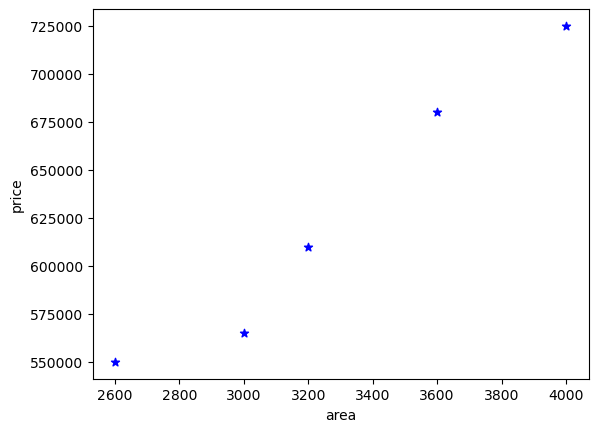

In [23]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='*')

In [24]:
new_df = df.drop('price',axis='columns')
new_df

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [25]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [26]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [28]:
reg.predict([[3300]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [11]:
reg.coef_       

array([135.78767123])

In [12]:
reg.intercept_     

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [14]:
reg.predict([[5000]])

array([859554.79452055])

In [29]:
area_df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/areas.csv")
area_df.head(3)

area
0  1000
1  1500
2  2300

In [30]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [31]:
area_df['prices']=p
area_df

area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [32]:
area_df.to_csv("prediction.csv")       

# Building linear regression model on canada per capita income

In [43]:
canada_df= pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/canada_per_capita_income.csv")
canada_df.head()

year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583

In [50]:
print(canada_df.columns)

Index(['year', 'per capita income (US$)'], dtype='object')


In [60]:
x = canada_df['year']
X = x.to_frame()  # Convert the Series 'x' to a DataFrame 'X'

y = canada_df['per capita income (US$)']

In [61]:
lreg=linear_model.LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [62]:
lreg.predict([[2030]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49573.34484664])

<h2 style="color:green" align="center"> 2.Machine Learning Concepts and Techniques: Linear Regression Multiple Variables</h2>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [63]:
m_df = pd.read_csv('/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/homeprices-2.csv')
m_df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [67]:
m_df.count()

area        6
bedrooms    5
age         6
price       6
dtype: int64

In [72]:
null_counts = m_df.isnull().sum()
null_counts

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [78]:
m_df.bedrooms.median()

4.0

In [79]:
m_df['bedrooms'].fillna(m_df.bedrooms.median(), inplace=True)

In [80]:
m_df.head()

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000

In [81]:
X=m_df.drop(['price'], axis="columns")
y=m_df.price

In [82]:
model=linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

<img height=300 width=300 src="equ.png" />

In [84]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [85]:
model.intercept_

221323.00186540402

In [87]:
model.predict([[3000, 3, 40]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [88]:
#checking the answers with mathematical calculations
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [90]:
model.predict([[2500, 4, 5]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

There is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


In [98]:
from word2number import w2n

In [92]:
df=pd.read_csv('/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/hiring.csv')
df.head()

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

In [94]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [101]:
df.experience = df.experience.fillna("zero")
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

In [102]:
df.experience = df.experience.apply(w2n.word_to_num)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000

In [104]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [105]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    7.0                           7      72000
7          11                    7.0                           8      80000

In [106]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [107]:
reg.predict([[2,9,6]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [108]:
reg.predict([[12,10,10]])

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

<h2 style="color:green" align="center">3.logistic regression:Predicting if a person would buy life insurnace based on his age.</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [140]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Logistic_reg and multivariate/insurance_data.csv")
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

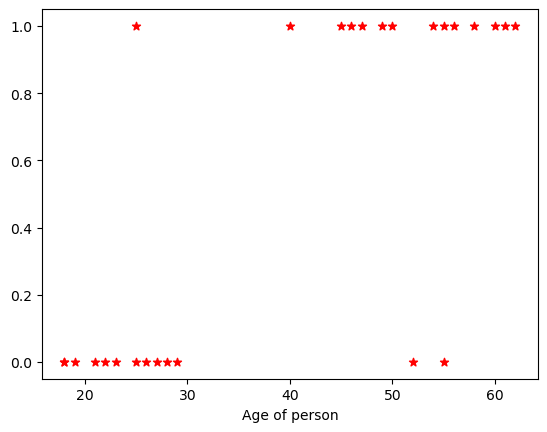

<Figure size 500x500 with 0 Axes>

In [141]:
plt.scatter(df.age, df.bought_insurance , color='red', marker='*')
plt.xlabel('Age of person')
plt.figure(figsize=(5, 5))
plt.show()

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df[['age']],df.bought_insurance, train_size=0.8, random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [144]:
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
X_test

age
8    62
13   29
9    61
21   26
0    22
11   28

In [146]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 0])

In [147]:
model.predict_proba(X_test)

array([[0.05428681, 0.94571319],
       [0.70555426, 0.29444574],
       [0.06039343, 0.93960657],
       [0.77085061, 0.22914939],
       [0.84096546, 0.15903454],
       [0.72848825, 0.27151175]])

In [148]:
model.score(X_test,y_test)

1.0

Downloaded employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [157]:
kdf = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Logistic_reg and multivariate/HR_comma_sep.csv")
kdf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [158]:
null_counts = kdf.isnull().sum()
print(null_counts)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [187]:
left = df[df.left==1]
left.shape

(3571, 10)

In [188]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [189]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  Department    salary  
left                                               
0                  0.026251    5.819041  1.347742  
1                  0.005321    6.035284  1.345842

From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

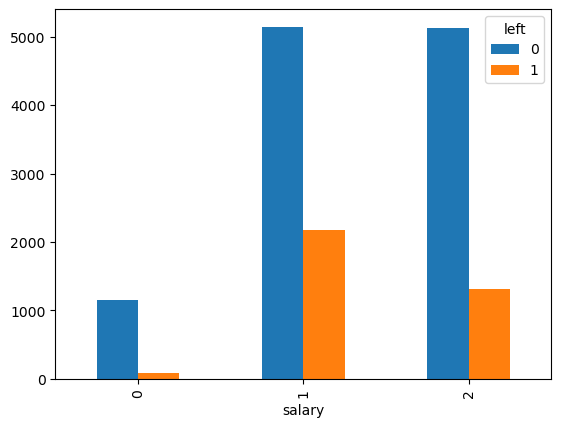

In [190]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

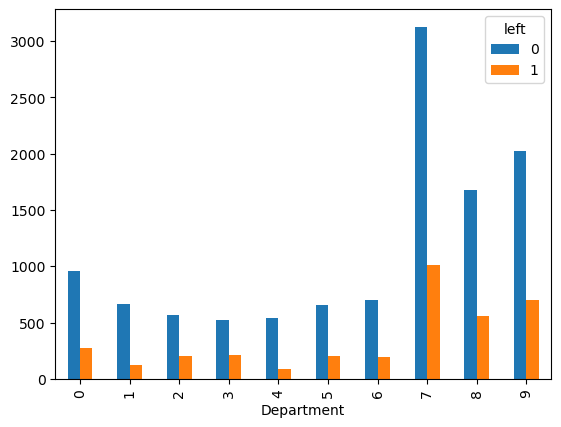

In [191]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [231]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0       1
1                0.80                   262                      0       2
2                0.11                   272                      0       2
3                0.72                   223                      0       1
4                0.37                   159                      0       1

**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [232]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [233]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [234]:
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0       1   
1                0.80                   262                      0       2   
2                0.11                   272                      0       2   
3                0.72                   223                      0       1   
4                0.37                   159                      0       1   

   salary_0  salary_1  salary_2  
0     False      True     False  
1     False     False      True  
2     False     False      True  
3     False      True     False  
4     False      True     False

In [235]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary_0  \
0                0.38                   157                      0     False   
1                0.80                   262                      0     False   
2                0.11                   272                      0     False   
3                0.72                   223                      0     False   
4                0.37                   159                      0     False   

   salary_1  salary_2  
0      True     False  
1     False      True  
2     False      True  
3      True     False  
4      True     False

In [236]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary_0  \
0                0.38                   157                      0     False   
1                0.80                   262                      0     False   
2                0.11                   272                      0     False   
3                0.72                   223                      0     False   
4                0.37                   159                      0     False   

   salary_1  salary_2  
0      True     False  
1     False      True  
2     False      True  
3      True     False  
4      True     False

In [286]:
y=df.left
X_train, X_test, y_train, y_test =train_test_split(X, df.left, train_size=0.70, random_state=30)

In [287]:
X_train.shape

(10499, 6)

In [288]:
y_train.shape

(10499,)

In [289]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [290]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [291]:
model.score(X_train, y_train)

0.7750261929707591

**Accuracy of the model**

In [285]:
model.score(X_test, y_test)

0.7808888888888889

<h2 style='color:blue' align="center">4.Logistic Regression: Multiclass Classification</h2>

In [294]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

<Figure size 500x500 with 0 Axes>

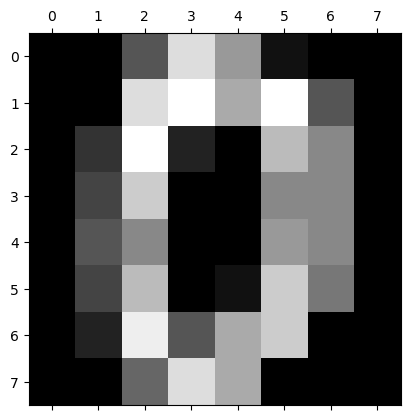

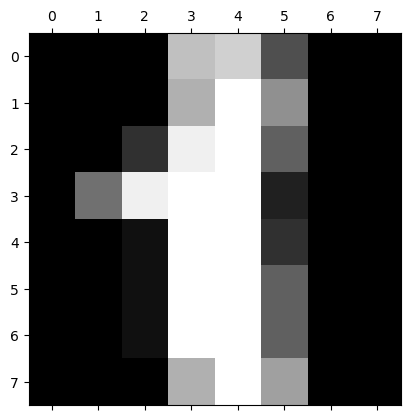

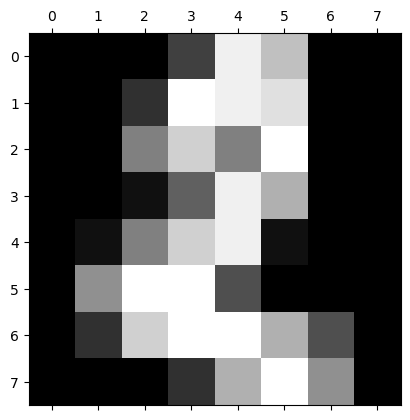

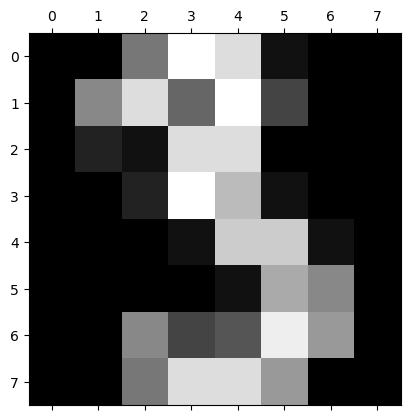

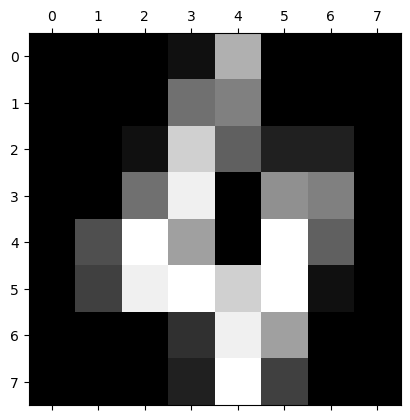

In [300]:
plt.gray()
plt.figure(figsize=(5, 5))
plt.show()
for i in range(5):
    plt.matshow(digits.images[i])


In [301]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [302]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/vijaykumarreddybommireddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [303]:
model.score(X_test, y_test)

0.9583333333333334

In [304]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [305]:
y_predicted = model.predict(X_test)

In [306]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 40,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  1],
       [ 0,  0,  1,  1,  0,  2,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

Text(95.72222222222221, 0.5, 'Truth')

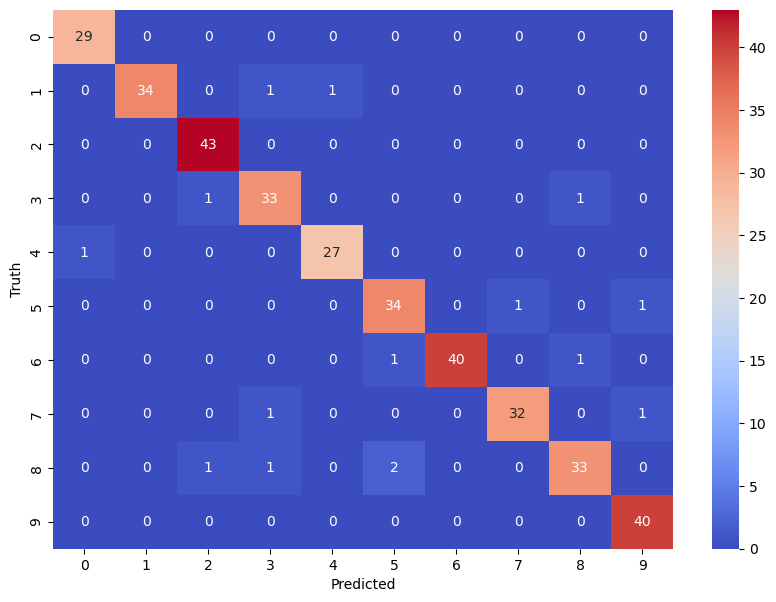

In [308]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />

In [311]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [317]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [320]:
iris.target_names[0]

'setosa'

In [337]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [338]:
model.score(X_test, y_test)

0.9666666666666667

In [345]:
model.predict(iris.data[78].reshape(1, -1))

array([1])

In [346]:
model.predict(iris.data[70:78])

array([2, 1, 1, 1, 1, 1, 1, 2])

Text(95.72222222222221, 0.5, 'Truth')

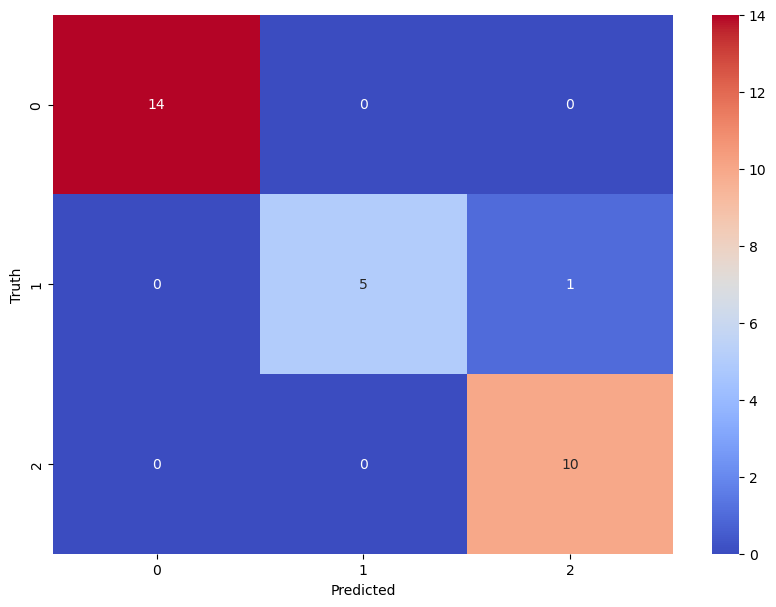

In [349]:
y_predicted = model.predict(X_test) 
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

5.<h2 style='color:purple'>5.Using pandas to create dummy variables</h2>

In [360]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/One-hot and train_test splitting/homeprices.csv")
df

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

In [361]:
dummies = pd.get_dummies(df.town)
dummies

monroe township  robinsville  west windsor
0              True        False         False
1              True        False         False
2              True        False         False
3              True        False         False
4              True        False         False
5             False        False          True
6             False        False          True
7             False        False          True
8             False        False          True
9             False         True         False
10            False         True         False
11            False         True         False
12            False         True         False

In [362]:
df_dummies= pd.concat([df,dummies],axis='columns')
df_dummies

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000             True        False         False
1   monroe township  3000  565000             True        False         False
2   monroe township  3200  610000             True        False         False
3   monroe township  3600  680000             True        False         False
4   monroe township  4000  725000             True        False         False
5      west windsor  2600  585000            False        False          True
6      west windsor  2800  615000            False        False          True
7      west windsor  3300  650000            False        False          True
8      west windsor  3600  710000            False        False          True
9       robinsville  2600  575000            False         True         False
10      robinsville  2900  600000            False         True         False
11      robinsville  3100  620000            False         True         False
12      robinsville  3600  695000            False         True         False

In [363]:
df_dummies.drop('town',axis='columns',inplace=True)
df_dummies

area   price  monroe township  robinsville  west windsor
0   2600  550000             True        False         False
1   3000  565000             True        False         False
2   3200  610000             True        False         False
3   3600  680000             True        False         False
4   4000  725000             True        False         False
5   2600  585000            False        False          True
6   2800  615000            False        False          True
7   3300  650000            False        False          True
8   3600  710000            False        False          True
9   2600  575000            False         True         False
10  2900  600000            False         True         False
11  3100  620000            False         True         False
12  3600  695000            False         True         False

***Dummy Variable Trap***

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [364]:
df_dummies.drop('west windsor',axis='columns',inplace=True)
df_dummies

area   price  monroe township  robinsville
0   2600  550000             True        False
1   3000  565000             True        False
2   3200  610000             True        False
3   3600  680000             True        False
4   4000  725000             True        False
5   2600  585000            False        False
6   2800  615000            False        False
7   3300  650000            False        False
8   3600  710000            False        False
9   2600  575000            False         True
10  2900  600000            False         True
11  3100  620000            False         True
12  3600  695000            False         True

In [366]:
X = df_dummies.drop('price',axis='columns')
y = df_dummies.price

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [367]:
X

area  monroe township  robinsville
0   2600             True        False
1   3000             True        False
2   3200             True        False
3   3600             True        False
4   4000             True        False
5   2600            False        False
6   2800            False        False
7   3300            False        False
8   3600            False        False
9   2600            False         True
10  2900            False         True
11  3100            False         True
12  3600            False         True

In [368]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [369]:
model.score(X,y)

0.9573929037221873

In [374]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [375]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

In [376]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [377]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000

In [378]:
X = dfle[['town','area']].values

In [379]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [380]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

Now use one hot encoder to create dummy variables for each of the town

In [398]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [399]:
encoded_features = ohe.fit_transform(df[['town']])

# To add these back to the dataframe you can do:
df_encoded = pd.concat([df.drop(columns=['town']), 
                        pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())], 
                       axis=1)

In [400]:
df_encoded

area   price  town_0  town_1  town_2
0   2600  550000     1.0     0.0     0.0
1   3000  565000     1.0     0.0     0.0
2   3200  610000     1.0     0.0     0.0
3   3600  680000     1.0     0.0     0.0
4   4000  725000     1.0     0.0     0.0
5   2600  585000     0.0     0.0     1.0
6   2800  615000     0.0     0.0     1.0
7   3300  650000     0.0     0.0     1.0
8   3600  710000     0.0     0.0     1.0
9   2600  575000     0.0     1.0     0.0
10  2900  600000     0.0     1.0     0.0
11  3100  620000     0.0     1.0     0.0
12  3600  695000     0.0     1.0     0.0

In [407]:
X = df_encoded[['town_0','town_1', 'area']]

In [408]:
X

town_0  town_1  area
0      1.0     0.0  2600
1      1.0     0.0  3000
2      1.0     0.0  3200
3      1.0     0.0  3600
4      1.0     0.0  4000
5      0.0     0.0  2600
6      0.0     0.0  2800
7      0.0     0.0  3300
8      0.0     0.0  3600
9      0.0     1.0  2600
10     0.0     1.0  2900
11     0.0     1.0  3100
12     0.0     1.0  3600

In [409]:
y=df_encoded.price.values

In [410]:
model.fit(X,y)

LinearRegression()

In [411]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([666914.10449366])

In [412]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([565089.22812299])

carprices.csv has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [413]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/One-hot and train_test splitting/carprices.csv")
df

Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5

In [416]:
df.describe()

Mileage  Sell Price($)   Age(yrs)
count     13.000000      13.000000  13.000000
mean   60884.615385   26023.076923   5.307692
std    19185.665055    8003.661021   1.652504
min    22500.000000   12000.000000   2.000000
25%    52000.000000   20000.000000   5.000000
50%    59000.000000   26100.000000   5.000000
75%    72000.000000   32000.000000   6.000000
max    91000.000000   40000.000000   8.000000

In [417]:
null_counts = df.isnull().sum()
null_counts

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [421]:
enc=LabelEncoder()
df['Car Model'] = enc.fit_transform(df[['Car Model']])
df

Car Model  Mileage  Sell Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1    57000          26100         5
3           1    22500          40000         2
4           1    46000          31500         4
5           0    59000          29400         5
6           0    52000          32000         5
7           0    72000          19300         6
8           0    91000          12000         8
9           2    67000          22000         6
10          2    83000          20000         7
11          2    79000          21000         7
12          2    59000          33000         5

In [426]:
dec=OneHotEncoder()
encoded_data = dec.fit_transform(df[['Car Model']])
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=dec.get_feature_names_out(['Car Model']))

df = df.reset_index(drop=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.drop('Car Model', axis=1, inplace=True)

df_encoded

Mileage  Sell Price($)  Age(yrs)  Car Model_0  Car Model_1  Car Model_2
0     69000          18000         6          0.0          1.0          0.0
1     35000          34000         3          0.0          1.0          0.0
2     57000          26100         5          0.0          1.0          0.0
3     22500          40000         2          0.0          1.0          0.0
4     46000          31500         4          0.0          1.0          0.0
5     59000          29400         5          1.0          0.0          0.0
6     52000          32000         5          1.0          0.0          0.0
7     72000          19300         6          1.0          0.0          0.0
8     91000          12000         8          1.0          0.0          0.0
9     67000          22000         6          0.0          0.0          1.0
10    83000          20000         7          0.0          0.0          1.0
11    79000          21000         7          0.0          0.0          1.0
12    59000          33000         5          0.0          0.0          1.0

X is set as a DataFrame containing the features 'Mileage', 'Age(yrs)', and the one-hot encoded 'Car Model' columns.
y is set as a Series containing the values from the 'Sell Price($)' column.

In [438]:
X = df_encoded[['Mileage', 'Age(yrs)','Car Model_0', 'Car Model_1', 'Car Model_2']]
y = df_encoded['Sell Price($)']

In [439]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [444]:
model.predict([[45000,4,0,0,1]])

array([36991.31721061])

In [445]:
model.predict([[86000,7,0,1,0]])

array([11080.74313219])

In [442]:
model.score(X,y)

0.9417050937281083

<h2 style="color:green" align="center">Save And Load Trained Model</h2>

In [447]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Gradient_descent and save model/homeprices.csv")
df.head()

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

In [448]:
model = LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [451]:
model.intercept_
model.coef_

array([135.78767123])

In [450]:
model.predict([[5000]])

array([859554.79452055])

### Using pickle

In [453]:
import pickle
with open('model_in_pickle','wb') as file:
    pickle.dump(model,file)
with open('model_in_pickle','rb') as file:
    mp = pickle.load(file)

In [454]:
mp.coef_

array([135.78767123])

In [455]:
mp.intercept_

180616.43835616432

In [456]:
mp.predict([[5000]])

array([859554.79452055])

### Using joblib

In [466]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [468]:
import joblib
joblib.dump(model, 'model_joblib')
mj = joblib.load('model_joblib')

In [473]:
mj.coef_
mj.intercept_
mj.predict([[5000]])

array([859554.79452055])

<h2 style="color:green" align="center">7. Finding Gradient_descent</h2>

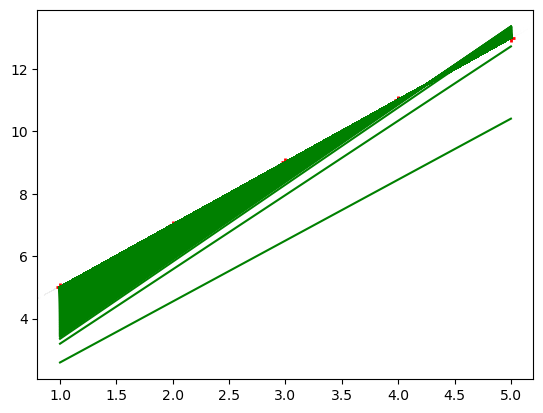

In [40]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    rate = 0.05
    n = len(x)
    plt.scatter(x, y, color='red', marker='+', linewidth=2)
    
    for k in range(1000):  # Iterate for a total of 1000 times
        for i in range(n):  # Iterate over each data point
            y_predicted = m_curr * x[i] + b_curr
            md = -(2/n) * (x[i] * (y[i] - y_predicted)) 
            yd = -(2/n) * (y[i] - y_predicted) 
            m_curr = m_curr - rate * md
            b_curr = b_curr - rate * yd

        # After each iteration, plot the current line
        y_predicted = m_curr * x + b_curr
        plt.plot(x, y_predicted, color='green')

    # Finally, show the plot
    plt.show()

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x, y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109 iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315 iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937 iteration 12
m 1.8898457

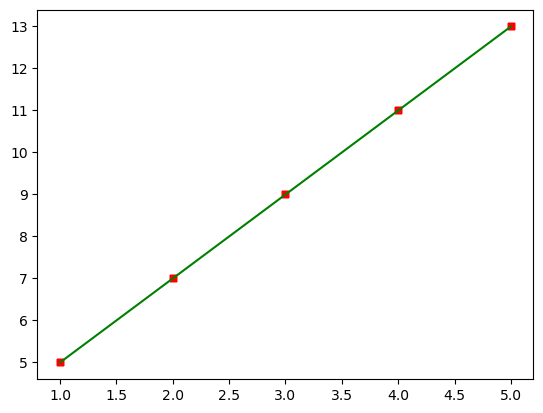

In [42]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08
    plt.scatter(x, y, color='red', marker='+', linewidth=5)
    
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    y_predicted = m_curr * x + b_curr
    plt.plot(x, y_predicted, color='green')
    
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

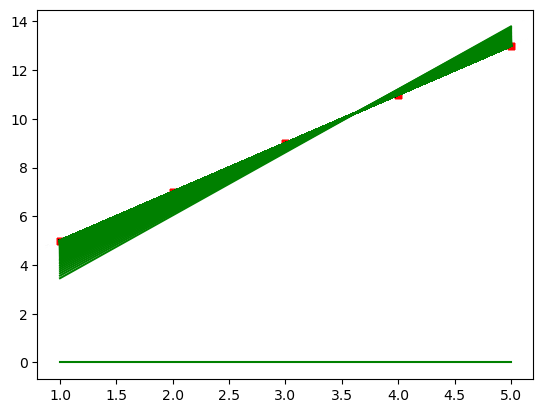

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0
    rate = 0.02
    n = len(x)
    plt.scatter(x, y, color='red', marker='+', linewidth=5)

    for i in range(10000):
        y_predicted = m_curr * x + b_curr
        md = -(2/n) * sum(x * (y - y_predicted))
        yd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

        # Plotting at specific intervals
        if i % 10 == 0:
            plt.plot(x, y_predicted, color='green')

    plt.show()

# These lines should be outside the function definition
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Calling the function
gradient_descent(x, y)


In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

def predict_using_sklean():
    df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Linear regression and multivarite/test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



m 1.0177477077569794, b 1.914406469113344, cost 31.604511371460184, iteration 337879
m 1.0177477074936545, b 1.9144064877744322, cost 31.60451137145844, iteration 337880
m 1.0177477072303376, b 1.914406506435092, cost 31.604511371456695, iteration 337881
m 1.0177477069670249, b 1.9144065250953233, cost 31.604511371454944, iteration 337882
m 1.0177477067037195, b 1.9144065437551263, cost 31.60451137145317, iteration 337883
m 1.0177477064404195, b 1.9144065624145008, cost 31.60451137145145, iteration 337884
m 1.0177477061771258, b 1.914406581073447, cost 31.604511371449732, iteration 337885
m 1.0177477059138378, b 1.9144065997319648, cost 31.604511371447973, iteration 337886
m 1.0177477056505566, b 1.9144066183900543, cost 31.604511371446222, iteration 337887
m 1.0177477053872803, b 1.9144066370477155, cost 31.604511371444502, iteration 337888
m 1.0177477051240114, b 1.9144066557049484, cost 31.604511371442772, iteration 337889
m 1.017747704860747, b 1.914406674361753, cost 31.6045113714

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



m 1.017738210851085, b 1.9150794901826658, cost 31.60451133465191, iteration 414548
m 1.0177382108057897, b 1.9150794933926516, cost 31.60451133465187, iteration 414549
m 1.0177382107604946, b 1.915079496602564, cost 31.604511334651814, iteration 414550
m 1.0177382107152015, b 1.9150794998124026, cost 31.604511334651786, iteration 414551
m 1.0177382106699084, b 1.9150795030221675, cost 31.604511334651704, iteration 414552
m 1.0177382106246173, b 1.9150795062318586, cost 31.60451133465166, iteration 414553
m 1.0177382105793267, b 1.915079509441476, cost 31.60451133465159, iteration 414554
m 1.0177382105340373, b 1.9150795126510198, cost 31.604511334651512, iteration 414555
m 1.0177382104887491, b 1.9150795158604899, cost 31.6045113346515, iteration 414556
m 1.0177382104434616, b 1.9150795190698864, cost 31.604511334651445, iteration 414557
m 1.0177382103981754, b 1.9150795222792092, cost 31.60451133465139, iteration 414558
m 1.0177382103528898, b 1.9150795254884583, cost 31.604511334651

<h2 style="color:green" align="center">8.Outliers removal using percentile, zscore, and IQR</h2>

In [43]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/heights.csv")
df.head()

name  height
0  mohan     5.9
1  maria     5.2
2  sakib     5.1
3    tao     5.5
4  virat     4.9

### Detect outliers using percentile

In [45]:
Max_threshold_height=df['height'].quantile(0.95)
Max_threshold_height

9.689999999999998

In [50]:
df[df['height']>Max_threshold_height]

name  height
9  imran    14.5

In [51]:
Min_threshold_height=df['height'].quantile(0.05)
Min_threshold_height

3.6050000000000004

In [52]:
df[df['height']<Min_threshold_height]

name  height
12  yoseph     1.2

In [55]:
new_df=df[(df['height']<Max_threshold_height) & (df['height']>Min_threshold_height)]
new_df

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5

<h3 style='color:purple'>Now lets explore banglore property prices dataset</h3>

In [59]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/bhp.csv")
df.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
5            3247  
6            7467  
7           18181  
8            4828  
9           36274

In [58]:
df.shape

(13200, 7)

In [60]:
df.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [63]:
#Explore samples that are above 99.90% percentile and below 1% percentile rank
max_threshold=df['price_per_sqft'].quantile(0.999)
max_threshold

50959.36200000098

In [67]:
min_threshold=df['price_per_sqft'].quantile(0.01)
min_threshold

2549.0

In [65]:
df[df['price_per_sqft']>max_threshold]

location       size  total_sqft  bath   price  bhk  \
345                other  3 Bedroom        11.0   3.0    74.0    3   
1005               other      1 BHK        15.0   1.0    30.0    1   
1106               other  5 Bedroom        24.0   2.0   150.0    5   
4044      Sarjapur  Road  4 Bedroom         1.0   4.0   120.0    4   
4924               other      7 BHK         5.0   7.0   115.0    7   
5911         Mysore Road  1 Bedroom        45.0   1.0    23.0    1   
6356        Bommenahalli  4 Bedroom      2940.0   3.0  2250.0    4   
7012               other      1 BHK       650.0   1.0   500.0    1   
7575               other      1 BHK       425.0   1.0   750.0    1   
7799               other      4 BHK      2000.0   3.0  1063.0    4   
8307   Bannerghatta Road      5 BHK      2500.0   4.0  1400.0    5   
9436        Indira Nagar  4 Bedroom      2400.0   5.0  1250.0    4   
11447         Whitefield  4 Bedroom        60.0   4.0   218.0    4   
12328              other  4 Bedroom      4350.0   8.0  2600.0    4   

       price_per_sqft  
345            672727  
1005           200000  
1106           625000  
4044         12000000  
4924          2300000  
5911            51111  
6356            76530  
7012            76923  
7575           176470  
7799            53150  
8307            56000  
9436            52083  
11447          363333  
12328           59770

In [68]:
df[df['price_per_sqft']<min_threshold]

location   size  total_sqft  bath  price  bhk  price_per_sqft
20                Kengeri  1 BHK       600.0   1.0  15.00    1            2500
130       Electronic City  2 BHK       880.0   1.0  16.50    2            1875
169              Attibele  1 BHK       450.0   1.0  11.00    1            2444
247            Chandapura  2 BHK       800.0   1.0  20.00    2            2500
250                 other  2 BHK       900.0   2.0  22.50    2            2500
...                   ...    ...         ...   ...    ...  ...             ...
12458               other  1 BHK      2559.0   1.0  55.00    1            2149
12463          Chandapura  1 BHK       410.0   1.0  10.00    1            2439
12532     Electronic City  2 BHK      1125.0   2.0  28.13    2            2500
12555  Kumaraswami Layout  2 BHK      1200.0   2.0  29.00    2            2416
12897         Kammasandra  3 BHK      1616.0   3.0  40.00    3            2475

[127 rows x 7 columns]

In [71]:
new_df=df[(df['price_per_sqft']<max_threshold) & (df['price_per_sqft']>min_threshold)]
new_df

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2                4305  
3                6245  
4                4250  
...               ...  
13195            6689  
13196           11111  
13197            5258  
13198           10407  
13199            3090  

[13050 rows x 7 columns]

### Outlier detection and removal using z-score and standard deviation

In [88]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/height_weight.csv")
df.head(5)

gender     height      weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [89]:
new_df = df.drop('weight', axis=1)

In [91]:
new_df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

<function matplotlib.pyplot.show(close=None, block=None)>

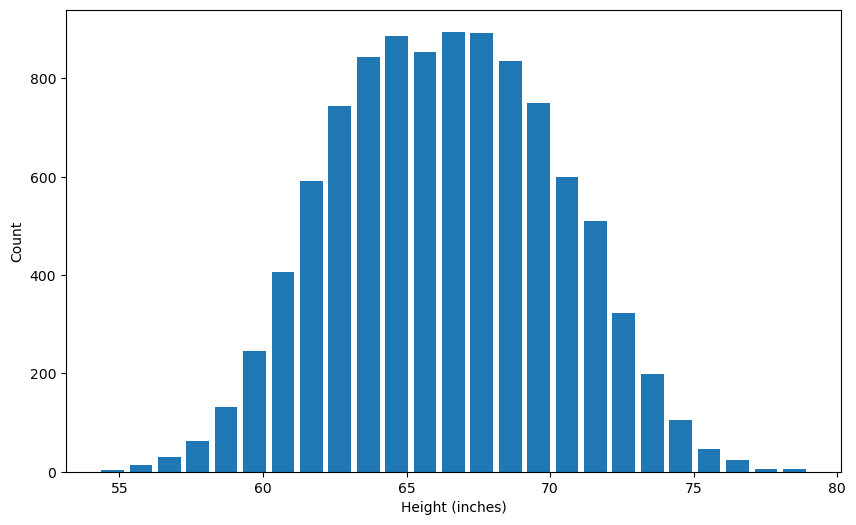

In [130]:
plt.hist(new_df.height, bins=25, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show

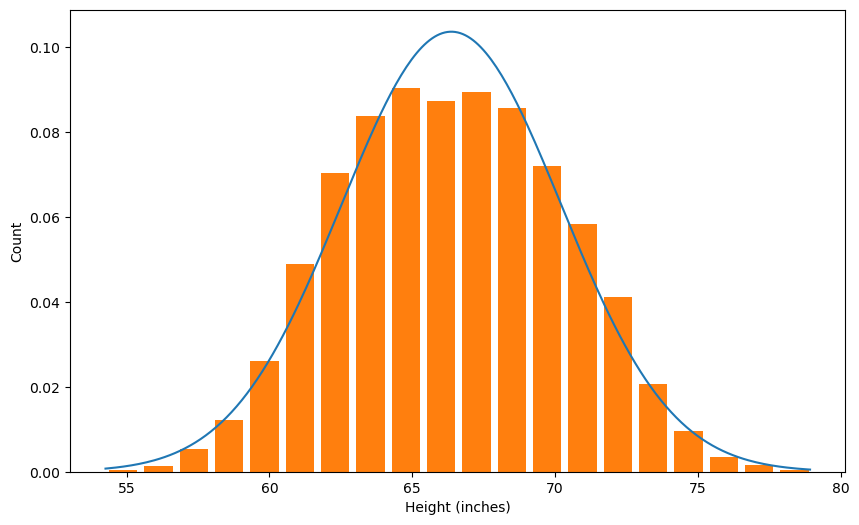

In [132]:
#Plot bell curve along with histogram for our dataset
from scipy.stats import norm
rng = np.arange(new_df.height.min(), new_df.height.max(),0.09)
plt.plot(rng, norm.pdf(rng,new_df.height.mean(),new_df.height.std()))

plt.hist(new_df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()


In [133]:
new_df.height.mean()

66.36755975482124

In [134]:
new_df.height.std()

3.8475281207732324

### Outlier detection and removal using 3 standard deviation

In [144]:
upper_limit = new_df.height.mean() + 3*new_df.height.std()
upper_limit

77.91014411714094

In [145]:
lower_limit = new_df.height.mean() -3*new_df.height.std()
lower_limit

54.82497539250154

In [146]:
lower_limit = new_df.height.mean() -3*new_df.height.std()
lower_limit

54.82497539250154

In [135]:
new_df[(new_df.height>upper_limit) | (new_df.height<lower_limit)]

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points.
Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

In [136]:
df_no_outlier_std_dev =new_df[(new_df.height<upper_limit) & (new_df.height>lower_limit)]
df_no_outlier_std_dev.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [138]:
new_df.shape

(10000, 2)

In [139]:
df_no_outlier_std_dev.shape 

(9993, 2)

### Outlier detection and removal using Z Score

Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [141]:
new_df['zscore'] = ( new_df.height - new_df.height.mean() ) / new_df.height.std()
new_df.head(5)

gender     height    zscore
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375

Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean.Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [142]:
new_df[(new_df.zscore<-3) | (new_df.zscore>3)]

gender     height    zscore
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

In [143]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

gender     height      weight    zscore
0   Male  73.847017  241.893563  1.943964
1   Male  68.781904  162.310473  0.627505
2   Male  74.110105  212.740856  2.012343
3   Male  71.730978  220.042470  1.393991
4   Male  69.881796  206.349801  0.913375

## Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [182]:
df=pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/bhp.csv")
df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [151]:
max_limit=df.total_sqft.quantile(0.999)
min_limit=df.total_sqft.quantile(0.01)

In [156]:
new_df=df[(df['total_sqft']<max_limit)&(df['total_sqft']>min_limit)]
new_df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [158]:
df.shape

(13200, 7)

In [159]:
new_df.shape

(13032, 7)

In [160]:
upper_limit=df.total_sqft.mean()+4*df.total_sqft.std()
lower_limit=df.total_sqft.mean()-4*df.total_sqft.std()

In [165]:
new_sdf=df[(df['total_sqft']<upper_limit)&(df['total_sqft']>lower_limit)]
new_sdf.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [164]:
df.shape

(13200, 7)

In [166]:
new_sdf.shape

(13131, 7)

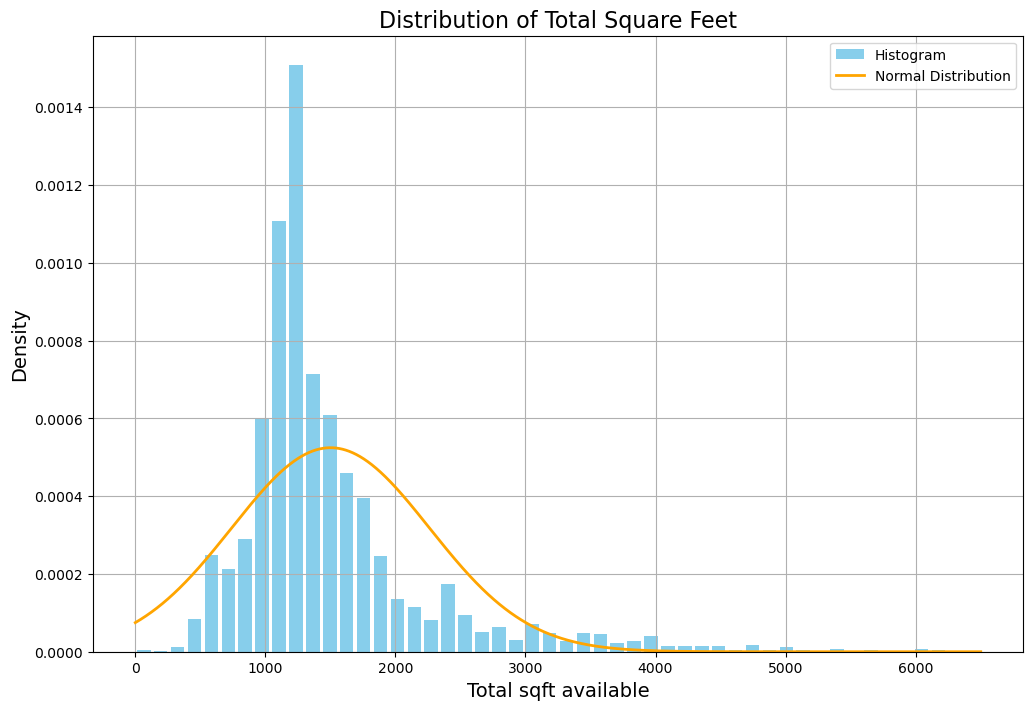

In [198]:
plt.figure(figsize=(12, 8)) 


plt.hist(new_sdf.total_sqft, bins=50, rwidth=0.8, density=True, color='skyblue', label='Histogram')

plt.xlabel('Total sqft available', fontsize=14)  
plt.ylabel('Density', fontsize=14) 

rng = np.arange(new_sdf.total_sqft.min(), new_sdf.total_sqft.max(), 0.2)
pdf_values = norm.pdf(rng, new_sdf.total_sqft.mean(), new_sdf.total_sqft.std())
plt.plot(rng, pdf_values, color='orange', linewidth=2, label='Normal Distribution')  

plt.title('Distribution of Total Square Feet', fontsize=16)  
plt.grid(True)  
plt.legend()  
plt.show()


In [200]:
df['z_score']=(df.total_sqft-df.total_sqft.mean())/df.total_sqft.std()

In [201]:
df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft   z_score  
0            3699 -0.403535  
1            4615  0.844320  
2            4305 -0.093187  
3            6245 -0.027723  
4            4250 -0.287154

In [203]:
outliers_df= df[(df.z_score<-4) | (df.z_score>4)]
outliers_df

location        size  total_sqft  bath   price  bhk  \
404              Rajaji Nagar       7 BHK     12000.0   6.0  2200.0    7   
435                Whitefield   4 Bedroom     11890.0   4.0   700.0    4   
509    Banashankari Stage III   4 Bedroom      8500.0   4.0   145.0    4   
598              Malleshwaram       7 BHK     12000.0   7.0  2200.0    7   
665                 Yelahanka       3 BHK     35000.0   3.0   130.0    3   
...                       ...         ...         ...   ...     ...  ...   
12948                   other  10 Bedroom      7150.0  13.0  3600.0   10   
12976                   other       4 BHK      6652.0   6.0   660.0    4   
13000                   other   4 Bedroom      6688.0   6.0   700.0    4   
13078                   other   4 Bedroom      9200.0   4.0  2600.0    4   
13081                   other   6 Bedroom      8000.0   6.0  2800.0    6   

       price_per_sqft    z_score  
404             18333   8.441364  
435              5887   8.352462  
509              1705   5.612677  
598             18333   8.441364  
665               371  27.029874  
...               ...        ...  
12948           50349   4.521613  
12976            9921   4.119131  
13000           10466   4.148226  
13078           28260   6.178415  
13081           35000   5.208579  

[69 rows x 8 columns]

In [202]:
new_zdf= df[(df.z_score>-4)&(df.z_score<4)]
new_zdf

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.403535  
1                4615  0.844320  
2                4305 -0.093187  
3                6245 -0.027723  
4                4250 -0.287154  
...               ...       ...  
13195            6689  1.533712  
13196           11111  1.652516  
13197            5258 -0.334838  
13198           10407  2.532642  
13199            3090 -0.812482  

[13131 rows x 8 columns]

### Outlier Detection and Removal Using IQR

In [206]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/heights.csv")
df.head()

name  height
0  mohan     5.9
1  maria     5.2
2  sakib     5.1
3    tao     5.5
4  virat     4.9

In [207]:
df.describe()

height
count  14.000000
mean    6.050000
std     2.779804
min     1.200000
25%     5.250000
50%     5.550000
75%     6.175000
max    14.500000

In [208]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.25, 6.175)

In [209]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [210]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.8625000000000003, 7.5625)

In [213]:
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier.shape, df.shape

((12, 2), (14, 2))

### Exercise
You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for weight parameters

(2) Using IQR detect weight outliers and print them

In [214]:
df=pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Feature eng/height_weight.csv")
df.head()

gender     height      weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

### Histgram for weights

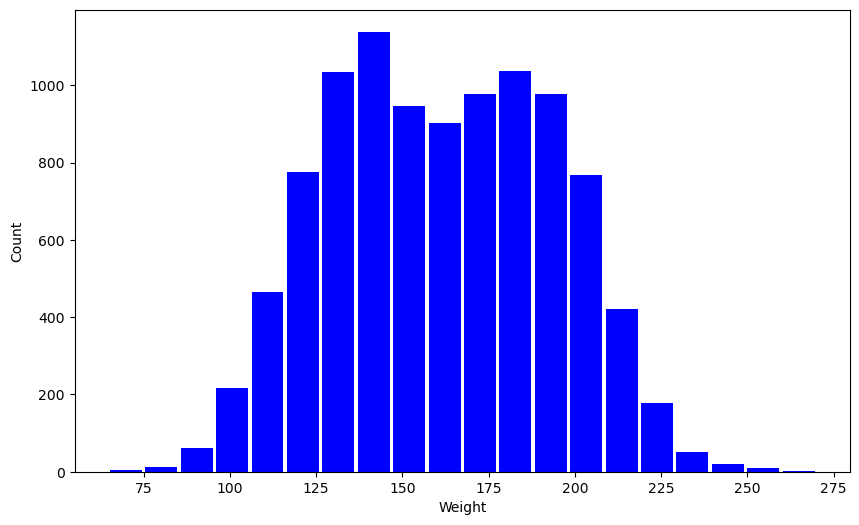

In [217]:
plt.hist(df.weight, bins=20, color='blue', rwidth=0.9)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [220]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [221]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [222]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [223]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [224]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]

gender     height      weight
2014   Male  78.998742  269.989699

<h2 style="color:green" align="center">Cross validation, gridsearch cv and regularization</h2>

### L1 and L2 Regularization

**We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.**
#### The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [229]:
import seaborn as sns
dataset = pd.read_csv('/Users/vijaykumarreddybommireddy/Desktop/ML/Cross validation, gridsearch cv and regularization/Melbourne_housing_FULL.csv')
dataset.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [230]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [231]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [232]:
dataset.head()

Suburb  Rooms Type Method SellerG             Regionname  \
0  Abbotsford      2    h     SS  Jellis  Northern Metropolitan   
1  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
3  Abbotsford      3    u     VB  Rounds  Northern Metropolitan   
4  Abbotsford      3    h     SP  Biggin  Northern Metropolitan   

   Propertycount  Distance         CouncilArea  Bedroom2  Bathroom  Car  \
0         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
1         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
2         4019.0       2.5  Yarra City Council       2.0       1.0  0.0   
3         4019.0       2.5  Yarra City Council       3.0       2.0  1.0   
4         4019.0       2.5  Yarra City Council       3.0       2.0  0.0   

   Landsize  BuildingArea      Price  
0     126.0           NaN        NaN  
1     202.0           NaN  1480000.0  
2     156.0          79.0  1035000.0  
3       0.0           NaN        NaN  
4     134.0         150.0  1465000.0

In [233]:
dataset.shape

(34857, 15)

In [238]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

#### Handling Missing values

In [240]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [241]:
dataset.dropna(inplace=True)

In [243]:
dataset.shape

(27244, 15)

#### Let's one hot encode the categorical features

In [244]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [245]:
dataset.head()

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car  Landsize  \
1      2         4019.0       2.5       2.0       1.0  1.0     202.0   
2      2         4019.0       2.5       2.0       1.0  0.0     156.0   
4      3         4019.0       2.5       3.0       2.0  0.0     134.0   
5      3         4019.0       2.5       3.0       2.0  1.0      94.0   
6      4         4019.0       2.5       3.0       1.0  2.0     120.0   

   BuildingArea      Price  Suburb_Aberfeldie  ...  \
1      160.2564  1480000.0              False  ...   
2       79.0000  1035000.0              False  ...   
4      150.0000  1465000.0              False  ...   
5      160.2564   850000.0              False  ...   
6      142.0000  1600000.0              False  ...   

   CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                False                              False   
2                                False                              False   
4                                False                              False   
5                                False                              False   
6                                False                              False   

   CouncilArea_Nillumbik Shire Council  CouncilArea_Port Phillip City Council  \
1                                False                                  False   
2                                False                                  False   
4                                False                                  False   
5                                False                                  False   
6                                False                                  False   

   CouncilArea_Stonnington City Council  CouncilArea_Whitehorse City Council  \
1                                 False                                False   
2                                 False                                False   
4                                 False                                False   
5                                 False                                False   
6                                 False                                False   

   CouncilArea_Whittlesea City Council  CouncilArea_Wyndham City Council  \
1                                False                             False   
2                                False                             False   
4                                False                             False   
5                                False                             False   
6                                False                             False   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  
1                            True                                   False  
2                            True                                   False  
4                            True                                   False  
5                            True                                   False  
6                            True                                   False  

[5 rows x 745 columns]

In [246]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [247]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [248]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [249]:
reg.score(test_X, test_y)

0.13853683161729224

In [250]:
reg.score(train_X, train_y)

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low.Normal Regression is clearly overfitting the data, let's try other models**

### Using Lasso (L1 Regularized) Regression Model.Regularization term: α * Σ|θ_i|
The penalty term is the sum of the absolute values of all the feature weights times the regularization parameter α.
Lasso regression can shrink some coefficients to zero, effectively performing feature selection by removing those features from the model.
Lasso is particularly useful when you have a high number of features, some of which may not be important and can be discarded.

tol: The tolerance for the optimization. This is the criterion that the optimization algorithm uses to determine whether it has converged. If the optimization algorithm's estimate of the optimal model parameters changes by less than this amount in one iteration, it will stop because it assumes it has found a solution that is good enough.

In [252]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [253]:
lasso_reg.score(test_X, test_y)

0.6636111369404492

In [254]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

### Using Ridge (L2 Regularized) Regression Model. Regularization term: α * Σ(θ_i)^2

Ridge regression shrinks the coefficients towards zero but does not set any of them exactly to zero. This means that all features are kept in the model.
It is particularly good for situations where there is multicollinearity in the data, or when you have more features than observations.
The penalty term is the sum of the squares of all the feature weights times the regularization parameter α.


In [255]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [256]:
ridge_reg.score(test_X, test_y)

0.6670848945194959

In [257]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

Both Ridge and Lasso will reduce model complexity and prevent overfitting. However, Lasso has the added benefit of feature selection because of its ability to shrink coefficients to zero. In contrast, Ridge will include all features in the final model but with reduced magnitude, which can still be beneficial for prediction.

### KFold Cross Validation

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**
The model will be trained using the liblinear solver, which applies regularized logistic regression.
Since multi_class='ovr' is set, for each class, a binary classifier will be trained to distinguish between that class and all other classes.

In [260]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9537037037037037

**SVM**

In [261]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.36666666666666664

**Random Forest**

In [262]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9574074074074074

### KFold cross validation

In [263]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [264]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [265]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [267]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'),\
                                     X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

Performance metrics from each fold are averaged to estimate the model's generalization performance.

In [268]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [269]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [270]:
scores_rf

[0.9332220367278798, 0.9616026711185309, 0.9315525876460768]

## cross_val_score function
cross_val_score uses stratifield kfold by default

In [272]:
from sklearn.model_selection import cross_val_score

In [276]:
#Logistic regression model performance using cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [277]:
#svm model performance using cross_val_score
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [278]:
#random forest performance using cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.93489149, 0.94991653, 0.9148581 ])

## Parameter tunning using k fold cross validation

In [279]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8803848541278707

In [280]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.936576660459342

In [287]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443513345747983

In [285]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9477001862197392

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

## Exercise

Use iris flower dataset from sklearn library and use cross_val_score against following
models to measure the performance of each. In the end figure out the model with best performance,
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [291]:
iris = load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, train_size=0.7)

In [296]:
#Logistic regression model performance using cross_val_score
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=3)
np.average(l_scores)

0.9533333333333333

In [295]:
#svm model performance using cross_val_score
s_scores=cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=3)
np.average(s_scores)

0.9733333333333333

In [297]:
#Decision tree performance using cross_val_score
d_scores = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target)
np.average(d_scores)

0.9666666666666668

In [298]:
#random forest performance using cross_val_score
r_scores=cross_val_score(RandomForestClassifier(n_estimators=40),iris.data, iris.target,cv=3)
np.average(r_scores)

0.9666666666666667

## Finding best model and hyper parameter tunning using GridSearchCV

In [299]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [300]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:150]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
47                 4.6               3.2                1.4               0.2   
48                 5.3               3.7                1.5               0.2   
49                 5.0               3.3                1.4               0.2   
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         flower  
47       setosa  
48       setosa  
49       setosa  
50   versicolor  
51   versicolor  
..          ...  
145   virginica  
146   virginica  
147   virginica  
148   virginica  
149   virginica  

[103 rows x 5 columns]

In [308]:
#Use train_test_split and manually tune parameters by trial and error
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

In [309]:
#Use K Fold Cross validation
#Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [310]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [311]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [312]:
#Above approach is tiresome and very manual. We can use for loop as an alternative
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

#From above results we can say that rbf with C=1 or 10  (or)  linear with C=1 will give best performance

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [313]:
#Use GridSearchSV
#GridSearchCV does exactly same thing as for loop above but in a single line of code
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00106506, 0.00059681, 0.00044603, 0.00031867, 0.00033898,
        0.00029159]),
 'std_fit_time': array([2.92163283e-04, 3.30064325e-05, 8.69406875e-05, 2.05386778e-05,
        5.41036847e-06, 1.33352522e-05]),
 'mean_score_time': array([0.00064492, 0.00041008, 0.00025649, 0.00019946, 0.00020585,
        0.00017939]),
 'std_score_time': array([1.75901085e-04, 3.72458356e-05, 2.72809202e-05, 7.82448949e-06,
        3.57659656e-06, 6.67333560e-06]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [314]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001065      0.000292         0.000645        0.000176       1   
1       0.000597      0.000033         0.000410        0.000037       1   
2       0.000446      0.000087         0.000256        0.000027      10   
3       0.000319      0.000021         0.000199        0.000008      10   
4       0.000339      0.000005         0.000206        0.000004      20   
5       0.000292      0.000013         0.000179        0.000007      20   

  param_kernel                         params  split0_test_score  \
0          rbf      {'C': 1, 'kernel': 'rbf'}           0.966667   
1       linear   {'C': 1, 'kernel': 'linear'}           0.966667   
2          rbf     {'C': 10, 'kernel': 'rbf'}           0.966667   
3       linear  {'C': 10, 'kernel': 'linear'}           1.000000   
4          rbf     {'C': 20, 'kernel': 'rbf'}           0.966667   
5       linear  {'C': 20, 'kernel': 'linear'}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0           0.966667           0.966667                1.0   
1                1.0           0.966667           0.966667                1.0   
2                1.0           0.966667           0.966667                1.0   
3                1.0           0.900000           0.966667                1.0   
4                1.0           0.900000           0.966667                1.0   
5                1.0           0.900000           0.933333                1.0   

   mean_test_score  std_test_score  rank_test_score  
0         0.980000        0.016330                1  
1         0.980000        0.016330                1  
2         0.980000        0.016330                1  
3         0.973333        0.038873                4  
4         0.966667        0.036515                5  
5         0.966667        0.042164                6

In [315]:
df[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1       1       linear         0.980000
2      10          rbf         0.980000
3      10       linear         0.973333
4      20          rbf         0.966667
5      20       linear         0.966667

In [316]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [317]:
clf.best_score_

0.9800000000000001

In [318]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

**Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [319]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1      20       linear         0.966667

**How about different models with different hyperparameters?**

In [320]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [321]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                best_params
0                  svm    0.980000  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.966667        {'n_estimators': 1}
2  logistic_regression    0.966667                   {'C': 5}

**Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification**

## Exercise
Find the best model and hyper parameters for sklearn digits dataset classification.

In [349]:
from sklearn.datasets import load_digits
digits=load_digits()

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.3)
model=[LogisticRegression(max_iter=1000),svm.SVC(), DecisionTreeClassifier, RandomForestClassifier]
model_scores=[]
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_scores.append(score)
    
print(model_scores)

[0.9611111111111111, 0.9888888888888889, 0.8407407407407408, 0.9685185185185186]


In [347]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [348]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                   best_params
0                      svm    0.947697  {'C': 1, 'kernel': 'linear'}
1            random_forest    0.895404          {'n_estimators': 10}
2      logistic_regression    0.922114                      {'C': 1}
3     naive_bayes_gaussian    0.806928                            {}
4  naive_bayes_multinomial    0.870350                            {}
5            decision_tree    0.811944      {'criterion': 'entropy'}

**For me the winner is svm (C=1, kernel=linear) with 94.76% score. It could be different for you as I have limited my parameters to be certain values only**

<h1 align='center' style='color:purple'>KNN (K Nearest Neighbors) Classification</h1>

In [351]:
from sklearn.datasets import load_iris
iris = load_iris()

In [352]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [353]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [356]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [357]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
45       0      setosa  
46       0      setosa  
47       0      setosa  
48       0      setosa  
49       0      setosa  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [358]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

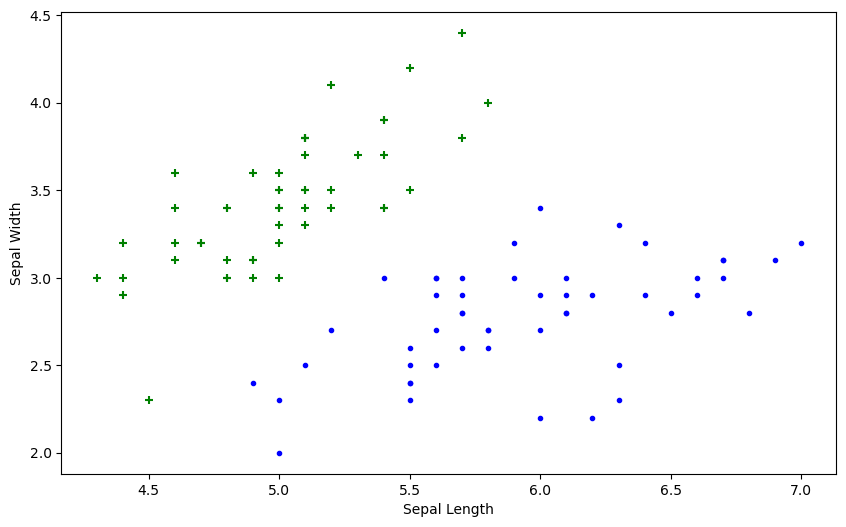

In [370]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
plt.show()

**Petal length vs Pepal Width (Setosa vs Versicolor)**

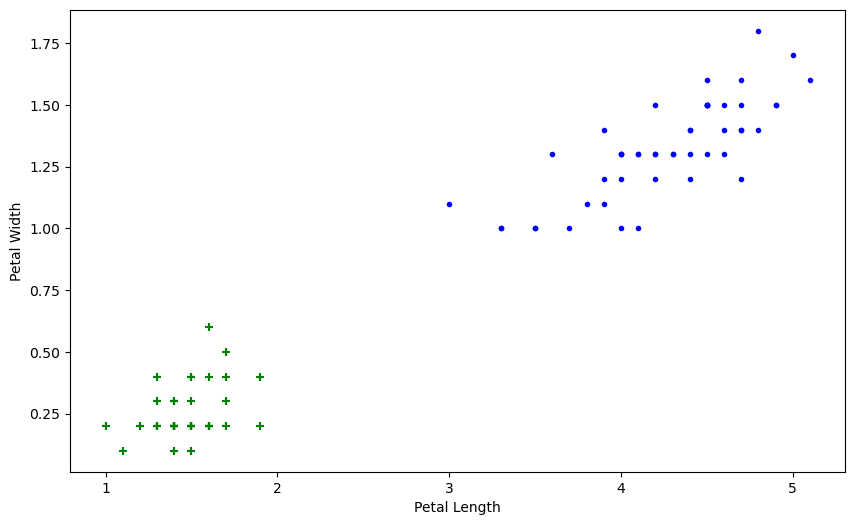

In [381]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.show()

In [372]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [388]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [389]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

In [390]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [391]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

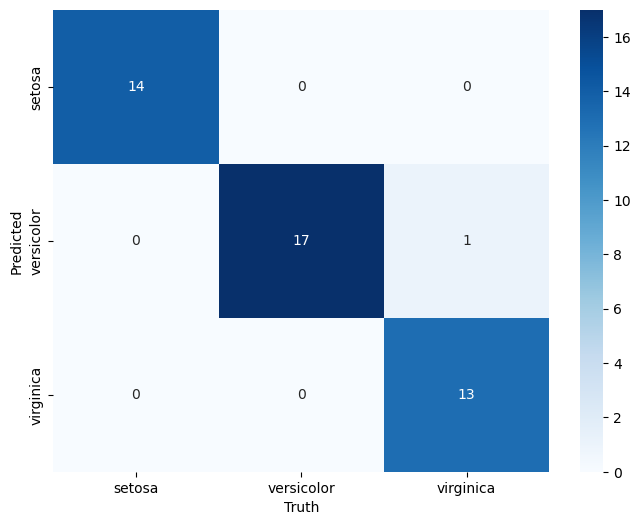

In [394]:
import seaborn as sn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.ylabel('Predicted')
plt.xlabel('Truth') #only FN and FP will change, if we change the labels.
plt.show()

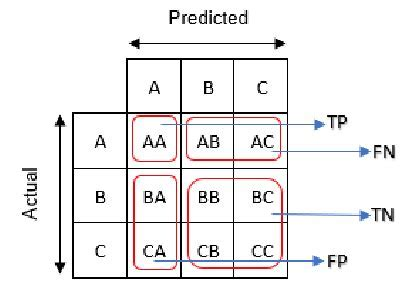

In [393]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Exercise 
From sklearn.datasets load digits dataset and do following

Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
Plot confusion matrix
Plot classification rep

In [421]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
digits=load_digits()
X_train,X_test, y_train,y_test=train_test_split(digits.data, digits.target, test_size=0.25)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9933333333333333

#### model.score is a method of the model object. It automates both prediction and accuracy calculation, making it a quick and convenient way to get the model's accuracy.(without calculating y_predict it can calculate directly using model.score(X_test, y_test).Because it calculated itself internelly where as in accuracy_score not possible.
#### accuracy_score is a function from sklearn.metrics. It requires two inputs: the true labels and the predicted labels. This method is more flexible as it allows you to use predictions made outside of scikit-learn's typical workflow (y_pred needs to be find to calculate through.

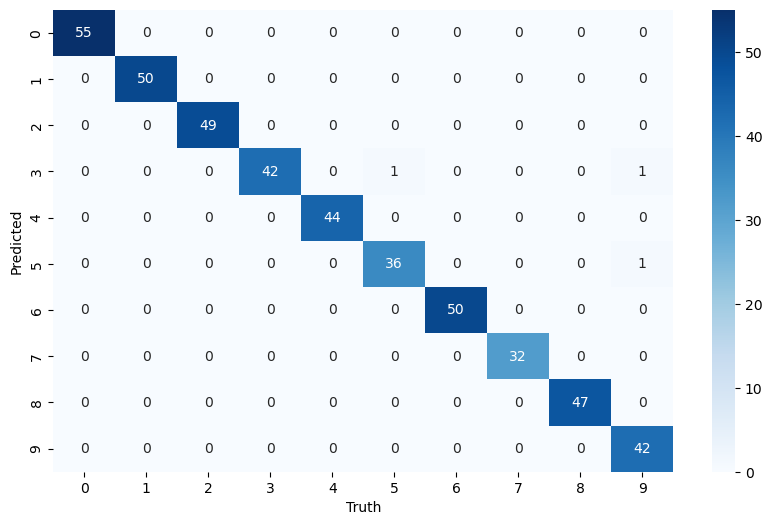

In [423]:
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
sn.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [428]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        49
           3       1.00      0.95      0.98        44
           4       1.00      1.00      1.00        44
           5       0.97      0.97      0.97        37
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        47
           9       0.95      1.00      0.98        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



<h1 align='center' style='color:purple'>Principal Component Analysis</h1>

In [567]:
from sklearn.datasets import load_digits
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [568]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [569]:
dataset.data.shape

(1797, 64)

In [570]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [571]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [572]:
dataset.data[0].reshape(1,-1)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [573]:
dataset.data[0].shape

(64,)

In [574]:
dataset.data[0].shape # we should assign like below other wise it won't show respective shape 

(64,)

In [575]:
reshaped_8_8 = dataset.data[0].reshape(8, 8)
print(reshaped_8_8.shape)  

reshaped_1_64 = dataset.data[0].reshape(1, -1)
print(reshaped_1_64.shape)  


(8, 8)
(1, 64)


In [576]:
reshaped_8_8

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [577]:
reshaped_1_64

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 1000x600 with 0 Axes>

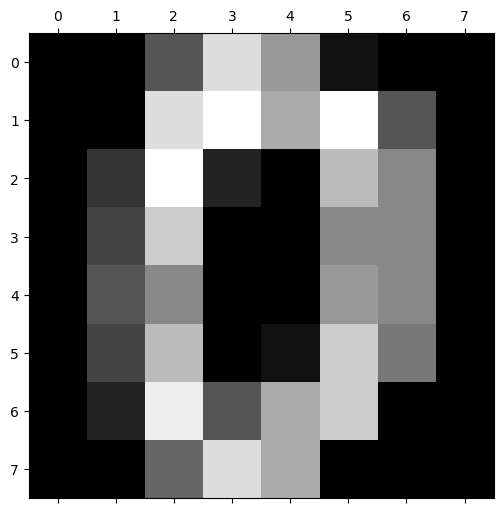

In [578]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [579]:
dataset.target[:5]

array([0, 1, 2, 3, 4])

In [580]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   
3        0.0        0.0        7.0       13.0       13.0        9.0   
4        0.0        0.0        0.0        2.0       16.0        4.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  
3        0.0        0.0  
4        0.0        0.0  

[5 rows x 64 columns]

In [581]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [582]:
X = df
y = dataset.target

In [583]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

<h3>Use PCA to reduce dimensions</h3>

In [585]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [586]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [587]:
pca.n_components_

29

**PCA created 29 components out of 64 original columns**

In [588]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [589]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [590]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

**Let's now select only two components**

In [591]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 4)

In [592]:
X_pca

array([[ -1.25946694,  21.27488404,  -9.46305399,  13.01417302],
       [  7.95761136, -20.76869849,   4.43950636, -14.8936615 ],
       [  6.99192319,  -9.95598711,   2.95855856, -12.28829419],
       ...,
       [ 10.80128337,  -6.9602511 ,   5.59955667,  -7.22774777],
       [ -4.87210077,  12.42395467, -10.17086569,  -6.66887441],
       [ -0.34438967,   6.36554924,  10.77370866,  -7.72621657]])

In [593]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979])

**You can see that both combined retains 0.14+0.13+0.11+0.08=0.27 or 46% of important feature information with just 4 highest components of total 64**

In [594]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8138888888888889

We get less accuancy (~81%) as using only 4 components did not retain much of the feature information. However in real life you will find many cases where using 4 or few PCA components can still give you a pretty good accuracy

In [672]:
# Exercise
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/KNN and PCA/heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [673]:
df.shape

(918, 12)

In [674]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

<h3>Treat Outliers</h3>

In [675]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
76    32   M           ASY        118          529          0     Normal   
149   54   M           ASY        130          603          1     Normal   
616   67   F           NAP        115          564          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
76     130              N      0.0     Flat             1  
149    125              Y      1.0     Flat             1  
616    160              N      1.6     Flat             0

In [676]:
df.shape

(918, 12)

In [677]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [678]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [679]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [680]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
166   50   M           ASY        140          231          0         ST   
702   59   M            TA        178          270          0        LVH   
771   55   M           ASY        140          217          0     Normal   
791   51   M           ASY        140          298          0     Normal   
850   62   F           ASY        160          164          0        LVH   
900   58   M           ASY        114          318          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
166    140              Y      5.0     Flat             1  
702    145              N      4.2     Down             0  
771    111              Y      5.6     Down             1  
791    122              Y      4.2     Flat             1  
850    145              N      6.2     Down             1  
900    140              N      4.4     Down             1

In [681]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [682]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
592   61   M           ASY        190          287          1        LVH   
732   56   F           ASY        200          288          1        LVH   
759   54   M           ATA        192          283          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
109    106              N      0.0       Up             0  
241    142              Y      2.0     Flat             1  
365    140              Y      1.0     Flat             1  
399     70              N      0.0     Flat             1  
592    150              Y      2.0     Down             1  
732    133              Y      4.0     Down             1  
759    195              N      0.0       Up             1

In [683]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [684]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [685]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [686]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [687]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [688]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40   M           ATA        140          289          0           1   
1   49   F           NAP        160          180          0           1   
2   37   M           ATA        130          283          0           2   
3   48   F           ASY        138          214          0           1   
4   54   M           NAP        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         3             0  
1    156               0      1.0         2             1  
2     98               0      0.0         3             0  
3    108               1      1.5         2             1  
4    122               0      0.0         3             0

In [689]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  \
0   40        140          289          0           1    172               0   
1   49        160          180          0           1    156               0   
2   37        130          283          0           2     98               0   
3   48        138          214          0           1    108               1   
4   54        150          195          0           1    122               0   

   Oldpeak  ST_Slope  HeartDisease  Sex_M  ChestPainType_ATA  \
0      0.0         3             0   True               True   
1      1.0         2             1  False              False   
2      0.0         3             0   True               True   
3      1.5         2             1  False              False   
4      0.0         3             0   True              False   

   ChestPainType_NAP  ChestPainType_TA  
0              False             False  
1               True             False  
2              False             False  
3              False             False  
4               True             False

In [690]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  \
0   40        140          289          0           1    172               0   
1   49        160          180          0           1    156               0   
2   37        130          283          0           2     98               0   
3   48        138          214          0           1    108               1   
4   54        150          195          0           1    122               0   

   Oldpeak  ST_Slope  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0         3   True               True              False   
1      1.0         2  False              False               True   
2      0.0         3   True               True              False   
3      1.5         2  False              False              False   
4      0.0         3   True              False               True   

   ChestPainType_TA  
0             False  
1             False  
2             False  
3             False  
4             False

In [691]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [692]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [693]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8674033149171271

<h3>Use PCA to reduce dimensions</h3>

In [694]:
X

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40        140          289          0           1    172   
1     49        160          180          0           1    156   
2     37        130          283          0           2     98   
3     48        138          214          0           1    108   
4     54        150          195          0           1    122   
..   ...        ...          ...        ...         ...    ...   
913   45        110          264          0           1    132   
914   68        144          193          1           1    141   
915   57        130          131          0           1    115   
916   57        130          236          0           3    174   
917   38        138          175          0           1    173   

     ExerciseAngina  Oldpeak  ST_Slope  Sex_M  ChestPainType_ATA  \
0                 0      0.0         3   True               True   
1                 0      1.0         2  False              False   
2                 0      0.0         3   True               True   
3                 1      1.5         2  False              False   
4                 0      0.0         3   True              False   
..              ...      ...       ...    ...                ...   
913               0      1.2         2   True              False   
914               0      3.4         2   True              False   
915               1      1.2         2   True              False   
916               0      0.0         2  False               True   
917               0      0.0         3   True              False   

     ChestPainType_NAP  ChestPainType_TA  
0                False             False  
1                 True             False  
2                False             False  
3                False             False  
4                 True             False  
..                 ...               ...  
913              False              True  
914              False             False  
915              False             False  
916              False             False  
917               True             False  

[902 rows x 13 columns]

In [695]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [696]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.712707182320442

<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [2]:
import pandas as pd
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Decision Tree ,Random forest and SVM/salaries.csv")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [6]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [14]:
target = df['salary_more_then_100k']  #or df.salary_more_then_100k'

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [16]:
inputs['company_n'] = label.fit_transform(inputs['company'])
inputs['job_n'] = label.fit_transform(inputs['job'])
inputs['degree_n'] = label.fit_transform(inputs['degree'])

In [17]:
inputs

company                  job     degree  company_n  job_n  degree_n
0       google      sales executive  bachelors          2      2         0
1       google      sales executive    masters          2      2         1
2       google     business manager  bachelors          2      0         0
3       google     business manager    masters          2      0         1
4       google  computer programmer  bachelors          2      1         0
5       google  computer programmer    masters          2      1         1
6   abc pharma      sales executive    masters          0      2         1
7   abc pharma  computer programmer  bachelors          0      1         0
8   abc pharma     business manager  bachelors          0      0         0
9   abc pharma     business manager    masters          0      0         1
10    facebook      sales executive  bachelors          1      2         0
11    facebook      sales executive    masters          1      2         1
12    facebook     business manager  bachelors          1      0         0
13    facebook     business manager    masters          1      0         1
14    facebook  computer programmer  bachelors          1      1         0
15    facebook  computer programmer    masters          1      1         1

In [18]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [19]:
inputs_n

company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1

In [27]:
array = df['salary_more_then_100k'].to_numpy()
array

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [28]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, array)
model.score(inputs_n,array)

1.0

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)
model.score(inputs_n,target)

1.0

Inputs_n is a DataFrame or a 2D NumPy array with n rows (samples), then target should be a Series or 1D array with exactly n elements like array or target.

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [35]:
model.predict([[2,1,0]])

array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [36]:
model.predict([[2,1,1]])

array([1])

## Exercise: 
**Build decision tree model to predict survival based on certain parameters**

In [37]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Decision Tree ,Random forest and SVM/titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [46]:
df.shape

(891, 12)

In [47]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [49]:
upper_outliers=df[df['Fare']>(df['Fare'].mean()+3*df['Fare'].std())]
upper_outliers.shape

(20, 12)

In [50]:
lower_outliers=df[df['Fare']<(df['Fare'].mean()-3*df['Fare'].std())]
lower_outliers.shape

(0, 12)

In [52]:
df=df[df['Fare']<(df['Fare'].mean()+3*df['Fare'].std())]
df.shape

(871, 12)

In [54]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])          #inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
df['Embarked']=label.fit_transform(df['Embarked'])

In [55]:
value_counts = df['Embarked'].value_counts()
value_counts

Embarked
2    636
0    156
1     77
3      2
Name: count, dtype: int64

In [44]:
null_cabins = df['Cabin'].isnull().sum()
null_cabins

687

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          684
Embarked         0
dtype: int64

In [72]:
df['Age']=df['Age'].fillna(df['Age'].mean())   

In [81]:
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

In [82]:
# Selecting specific columns and checking if they are all numeric
selected_columns = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']]
numeric_columns = selected_columns.select_dtypes(include=[np.number])
numeric_columns

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.661164      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[871 rows x 7 columns]

In [83]:
# Checking if the number of numeric columns matches the number of selected columns
all_numeric = numeric_columns.shape[1] == selected_columns.shape[1]
all_numeric

True

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)
model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=10, 
    min_samples_split=4, 
    min_samples_leaf=2, 
    max_features='sqrt', 
    random_state=3
)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8342857142857143

<h3 style='color:purple' align='center'>Random Forest Classification</h3>

In [158]:
from sklearn.datasets import load_digits
digits = load_digits()

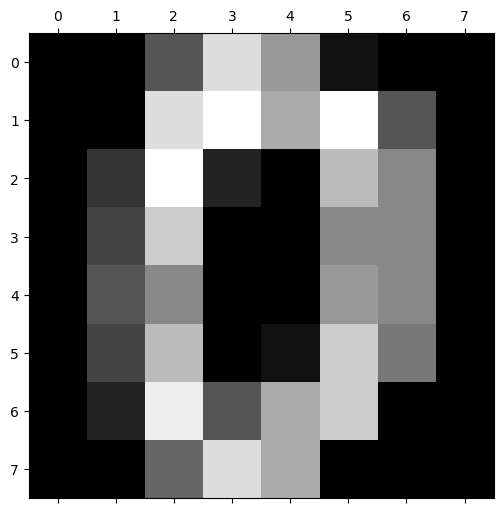

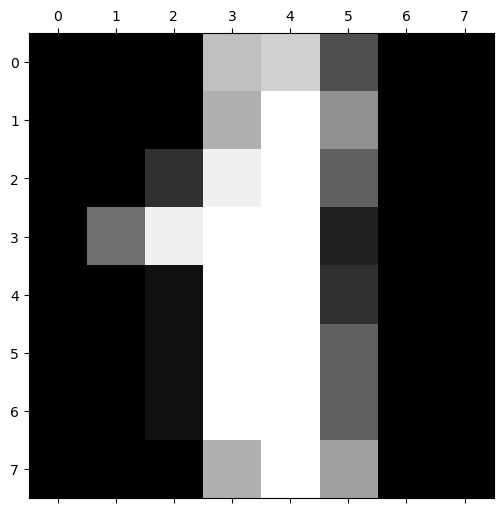

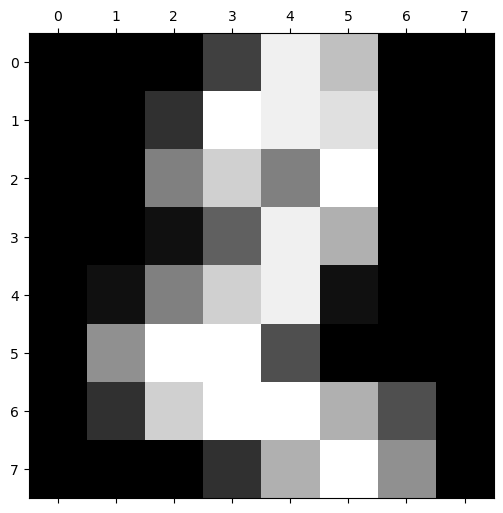

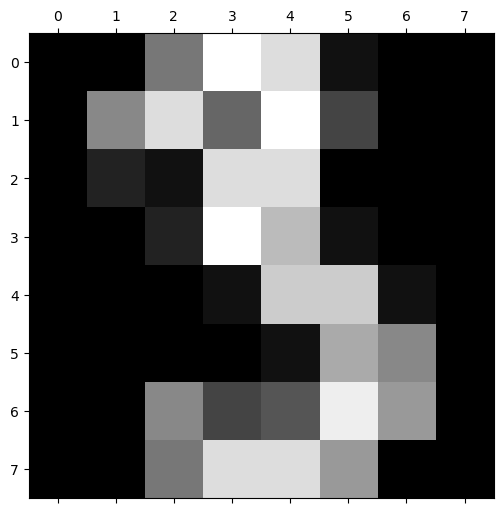

<Figure size 800x800 with 0 Axes>

In [165]:
for i in range(4):
    plt.matshow(digits.images[i]) 

plt.figure(figsize=(8, 8)) 
plt.show()

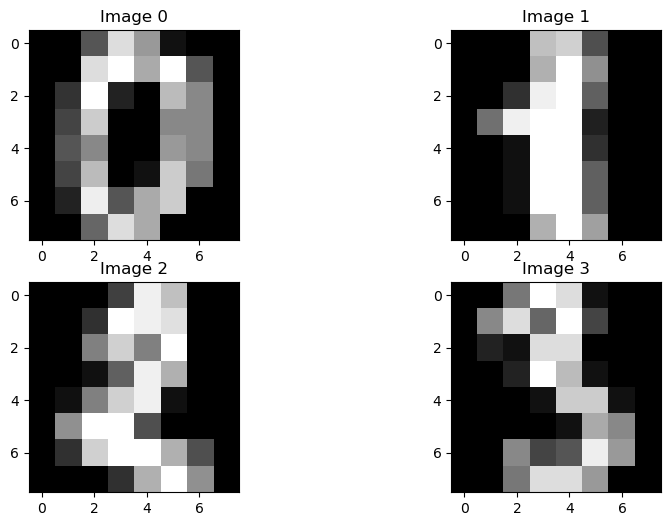

In [168]:
for i in range(4):
    plt.subplot(2, 2, i + 1) 
    plt.imshow(digits.images[i], cmap='gray')  #  plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Image {i}")

plt.show()

Here are three key differences between Matplotlib's imshow and matshow:

imshow does not show grid lines by default and is optimized for displaying images.
matshow automatically adds grid lines and a colorbar, making it better suited for matrix visualization.
Origin Placement:

imshow has the origin at the upper left corner by default, but this can be changed.
matshow always has the origin at the upper left corner, aligning with typical matrix row-column indexing.
Intended Use:

imshow is a general-purpose function for displaying images and can handle a wide range of image formats and customizations.
matshow is specifically tailored for matrices, offering features like automatic colorbars and cell demarcation that are useful for matrix data.

In [169]:
df = pd.DataFrame(digits.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [170]:
df['target'] = digits.target

In [171]:
X = df.drop('target',axis='columns')
y = df.target

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [173]:
model.score(X_test, y_test)

0.9638888888888889

In [175]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  1,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

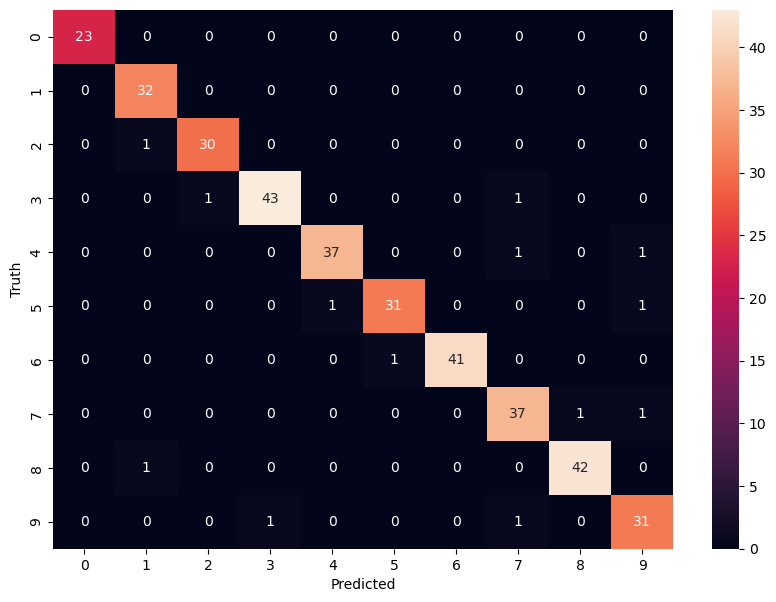

In [176]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Exercise


Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [192]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators: {score}")


Accuracy with default n_estimators: 1.0


After establishing the baseline score, I will fine-tune the model by varying the number of trees and identifying the best score:

In [193]:
best_score = 0
best_n_estimators = 0

# Trying different values for n_estimators
for n in range(1, 101):  
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        best_n_estimators = n

print(f"Best score: {best_score} with n_estimators: {best_n_estimators}")


Best score: 1.0 with n_estimators: 1


<h2 style='color:blue' align="center">Support Vector Machine Tutorial</h2>

In [197]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of gamma values and kernel types to try
gamma_range = np.logspace(-4, 1, 6)  # Logarithmic scale
kernel_types = ['linear', 'rbf', 'poly']

best_score = 0
best_params = {'gamma': None, 'kernel': None}

for gamma in gamma_range:
    for kernel in kernel_types:
        model = SVC(gamma=gamma, kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_params['gamma'] = gamma
            best_params['kernel'] = kernel

print(f"Best score: {best_score}, Best parameters: {best_params}")


Best score: 1.0, Best parameters: {'gamma': 0.0001, 'kernel': 'linear'}


### Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

Measure accuracy of your model using different kernels such as rbf and linear.
Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
Use 80% of samples as training data size

In [199]:
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kernels = ['rbf', 'linear']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy}")

# Tune the model using regularization (C) and gamma parameters
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range for C
    'gamma': np.logspace(-3, 3, 7),  # Range for gamma
    'kernel': ['rbf']  # Only tuning rbf kernel
}

# Create GridSearchCV object
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

Accuracy with rbf kernel: 0.9861111111111112
Accuracy with linear kernel: 0.9777777777777777
Best parameters: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.9895639759969029
Test set accuracy: 0.9888888888888889


<h2 style="text-align: center; color: green;">Ensemble Learning: Bagging</h2>

**We will use pima indian diabetes dataset to predict if a person has a diabetes or not based on certain features such as blood pressure, skin thickness, age etc. We will train a standalone model first and then use bagging ensemble technique to check how it can improve the performance of the model**

In [200]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/Bagging/diabetes (1).csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [201]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [203]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [204]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

Cross validation:Although it too splits the dataset into k equal folds, each fold has the same ratio of instances of target variables that are in the complete dataset. This enables it to work perfectly for imbalanced datasets, but not for time-series data.

<h3>Train using stand alone model</h3>

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.69480519, 0.66883117, 0.65584416, 0.75816993, 0.7254902 ])

In [208]:
scores.mean()

0.7006281300398948

<h3>Train using Bagging</h3>

In [209]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7517361111111112

In [210]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [211]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [212]:
scores.mean()

0.7578728461081402

<h3>Train using Random Forest</h3>(almost same as bagging with baseclassifier of decisiontree)

In [213]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.7773958068075715

Download heart disease dataset heart.csv in [Exercise](https://github.com/codebasics/py/tree/master/ML/19_Bagging/Exercise) folder and do following, (credits of dataset:  https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
1. Convert text columns to numbers using label encoding and one hot encoding
1. Apply scaling
1. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
1. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
1. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [214]:
import pandas as pd
df=pd.read_csv('/Users/vijaykumarreddybommireddy/Desktop/ML/Bagging/heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [232]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [227]:
df.shape

(918, 12)

In [216]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [220]:
max_old=df['Oldpeak'].mean()+3*df['Oldpeak'].std()
min_old=df['Oldpeak'].mean()-3*df['Oldpeak'].std()

In [228]:
max_BP=df['RestingBP'].mean()+3*df['RestingBP'].std()
min_BP=df['RestingBP'].mean()-3*df['RestingBP'].std()

In [230]:
max_chol=df['Cholesterol'].mean()+3*df['Cholesterol'].std()
min_chol=df['Cholesterol'].mean()-3*df['Cholesterol'].std()

In [233]:
max_hr=df['MaxHR'].mean()+3*df['MaxHR'].std()
min_hr=df['MaxHR'].mean()-3*df['MaxHR'].std()

In [237]:
new_df = df[(df['Oldpeak'] > min_old) & (df['Oldpeak'] < max_old) &
            (df['RestingBP'] > min_BP) & (df['RestingBP'] < max_BP) &
            (df['Cholesterol'] > min_chol) & (df['Cholesterol'] < max_chol) &
            (df['MaxHR'] > min_hr) & (df['MaxHR'] < max_hr)]
new_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[899 rows x 12 columns]

In [238]:
ndf = new_df.copy()
ndf.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

ndf.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

ndf.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

ndf.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40   M           ATA        140          289          0           1   
1   49   F           NAP        160          180          0           1   
2   37   M           ATA        130          283          0           2   
3   48   F           ASY        138          214          0           1   
4   54   M           NAP        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         3             0  
1    156               0      1.0         2             1  
2     98               0      0.0         3             0  
3    108               1      1.5         2             1  
4    122               0      0.0         3             0

Remember, LabelEncoder is typically used for encoding target values (y) rather than input features (X). If x is a feature in your dataset, and it's a nominal categorical variable (i.e., without intrinsic order), you might want to consider using OneHotEncoder or pd.get_dummies() for encoding, as they are more suitable for feature encoding

In [264]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ndf['ChestPainType']=encoder.fit_transform(ndf['ChestPainType'])
ndf['Sex']=encoder.fit_transform(ndf['Sex'])
ndf

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           3   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         3             0  
1      156               0      1.0         2             1  
2       98               0      0.0         3             0  
3      108               1      1.5         2             1  
4      122               0      0.0         3             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         2             1  
914    141               0      3.4         2             1  
915    115               1      1.2         2             1  
916    174               0      0.0         2             1  
917    173               0      0.0         3             0  

[899 rows x 12 columns]

In [273]:
X = ndf.drop('HeartDisease', axis=1)
y = ndf.HeartDisease

In [336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42815446,  0.515943  ,  0.2245723 , ..., -0.8229452 ,
        -0.85546862,  1.04249607],
       [-0.47585532, -1.93819859,  1.27063705, ..., -0.8229452 ,
         0.13751561, -0.62216462],
       [-1.7455875 ,  0.515943  ,  0.2245723 , ..., -0.8229452 ,
        -0.85546862,  1.04249607],
       ...,
       [ 0.3706328 ,  0.515943  , -0.82149245, ...,  1.21514774,
         0.33611246, -0.62216462],
       [ 0.3706328 , -1.93819859,  0.2245723 , ..., -0.8229452 ,
        -0.85546862, -0.62216462],
       [-1.63977649,  0.515943  ,  1.27063705, ..., -0.8229452 ,
        -0.85546862,  1.04249607]])

***If you don't use scaled data it will be show lot difference in the accuracy of model.U can check below instead of Xscaled use X***

## Standardalone support vector machine model

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8740740740740741

In [357]:
scores = cross_val_score(SVC(), X_scaled, y, cv=5)
scores.mean()

0.8197268777157045

## Bagging model

In [358]:
bag_model = BaggingClassifier(
    base_estimator=SVC(),  
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
)

bag_model.fit(X_train, y_train)
print("OOB Score:", bag_model.oob_score_)

OOB Score: 0.8600953895071543


In [359]:
bag_model.score(X_test, y_test)

0.8814814814814815

In [360]:
bag_model = BaggingClassifier(
    base_estimator=SVC(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
)
scores = cross_val_score(bag_model, X_scaled, y, cv=5)
scores

array([0.83888889, 0.86111111, 0.83333333, 0.81111111, 0.77094972])

In [361]:
scores.mean()

0.8230788330229671

## Standalone Decision tree model

In [348]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)
modeld=DecisionTreeClassifier()
modeld.fit(X_train,y_train)
modeld.score(X_test,y_test)

0.7722222222222223

In [349]:
scores = cross_val_score(DecisionTreeClassifier(), X_scaled, y, cv=5)
scores.mean()

0.7440409683426442

## Bagging model

In [350]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8650904033379694

In [351]:
bag_model.score(X_test, y_test)

0.8388888888888889

In [352]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X_scaled, y, cv=5)
scores

array([0.88888889, 0.82222222, 0.83333333, 0.81666667, 0.75418994])

In [353]:
scores.mean()

0.8230602110490377

<h2 style='color:purple' align='center'>Naive Bayes : Predicting survival from titanic crash</h2>

In [362]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/k means and naive bayes/titanic.csv")
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [363]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0

In [365]:
inputs = df.drop('Survived',axis='columns')
y = df.Survived

dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)
 for this again you have to concat with main data frame.

  female	male
0	0	     1
1	1	     0
2	1	     0   



In [369]:
X = pd.get_dummies(inputs, drop_first=True)
X.head(3)

Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500      True
1       1  38.0  71.2833     False
2       3  26.0   7.9250     False

You can have a doubt if you see True or false in the column created by dummy.In machine learning models, boolean values (True/False) are typically treated as binary (1/0). Most models in libraries like scikit-learn will automatically handle these boolean values correctly, interpreting True as 1 and False as 0.

In [374]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [375]:
X.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [376]:
X.Age = X.Age.fillna(X.Age.mean())
X.head()

Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500      True
1       1  38.0  71.2833     False
2       3  26.0   7.9250     False
3       1  35.0  53.1000     False
4       3  35.0   8.0500      True

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [378]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7910447761194029

In [379]:
X_test[0:10]

Pclass        Age     Fare  Sex_male
734       2  23.000000  13.0000      True
0         3  22.000000   7.2500      True
434       1  50.000000  55.9000      True
783       3  29.699118  23.4500      True
825       3  29.699118   6.9500      True
785       3  25.000000   7.2500      True
803       3   0.420000   8.5167      True
585       1  18.000000  79.6500     False
274       3  29.699118   7.7500     False
657       3  32.000000  15.5000     False

In [380]:
y_test[0:10]

734    0
0      0
434    0
783    0
825    0
785    0
803    1
585    1
274    1
657    0
Name: Survived, dtype: int64

In [381]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [382]:
model.predict_proba(X_test[:10])

array([[0.91563616, 0.08436384],
       [0.95836657, 0.04163343],
       [0.65732454, 0.34267546],
       [0.96195   , 0.03805   ],
       [0.96223001, 0.03776999],
       [0.96018984, 0.03981016],
       [0.92802055, 0.07197945],
       [0.02185086, 0.97814914],
       [0.44338908, 0.55661092],
       [0.45176002, 0.54823998]])

In [387]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GaussianNB(),X_train, y_train, cv=5)
scores

array([0.768     , 0.784     , 0.752     , 0.7983871 , 0.76612903])

In [388]:
scores.mean()

0.7737032258064517

<h2 style='color:purple' align='center'>Naive Bayes : Email spam filter </h2>

In [389]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/k means and naive bayes/spam.csv")
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [390]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [391]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

In [392]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [393]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [394]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [396]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9874439461883409

**Sklearn Pipeline**

In [398]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [399]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [400]:
clf.score(X_test,y_test)

0.9874439461883409

In [401]:
clf.predict(emails)

array([0, 1])

<h1 align='center' style='color:purple'>Clustering With K Means </h1>

In [413]:
data = {
    'Pclass': [3, 1, 3],
    'Age': [22.0, 38.0, 26.0],
    'Fare': [7.2500, 71.2833, 7.9250],
    'Sex': ['male', 'female', 'female']
}

df = pd.DataFrame(data)
X = pd.get_dummies(df, columns=['Sex'], drop_first=True)  # or X = pd.get_dummies(df, drop_first=True) 
print("Before converting to int:\n", X)                   #above both codes give same result.


Before converting to int:
    Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500      True
1       1  38.0  71.2833     False
2       3  26.0   7.9250     False


In [412]:
X['Sex_male'] = X['Sex_male'].astype(int)
print("After converting to int:\n", X)


After converting to int:
    Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500         1
1       1  38.0  71.2833         0
2       3  26.0   7.9250         0


astype Use Cases:
Converting boolean values (True/False) to binary values (1/0).
Changing the data type of a column from float to integer when the decimal part is not needed.

In [416]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [417]:
df = pd.read_csv("/Users/vijaykumarreddybommireddy/Desktop/ML/k means and naive bayes/income.csv")
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Text(0, 0.5, 'Income($)')

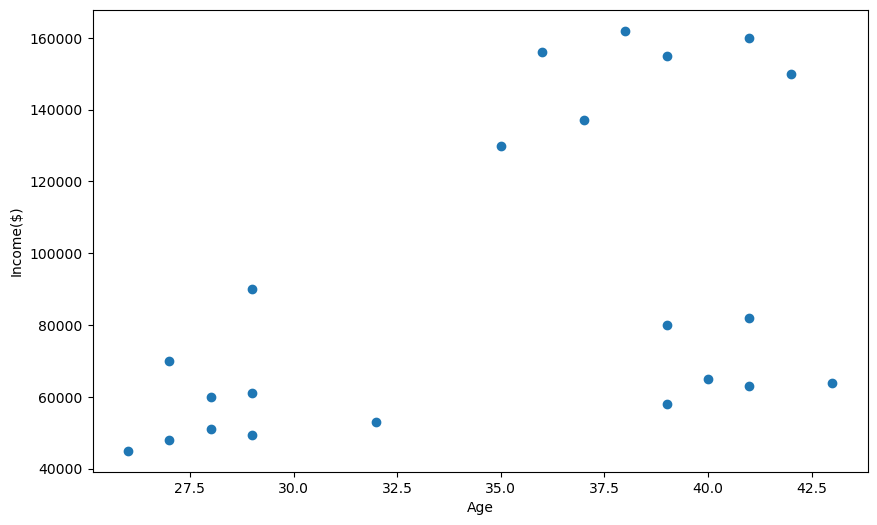

In [418]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [419]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [420]:
df['cluster']=y_predicted
df.head()

Name  Age  Income($)  cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1

In [421]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

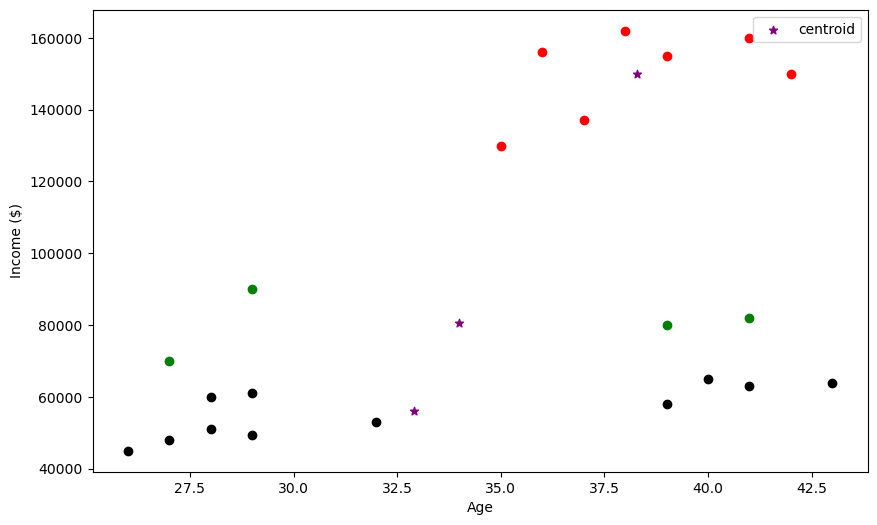

In [425]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [431]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [432]:
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

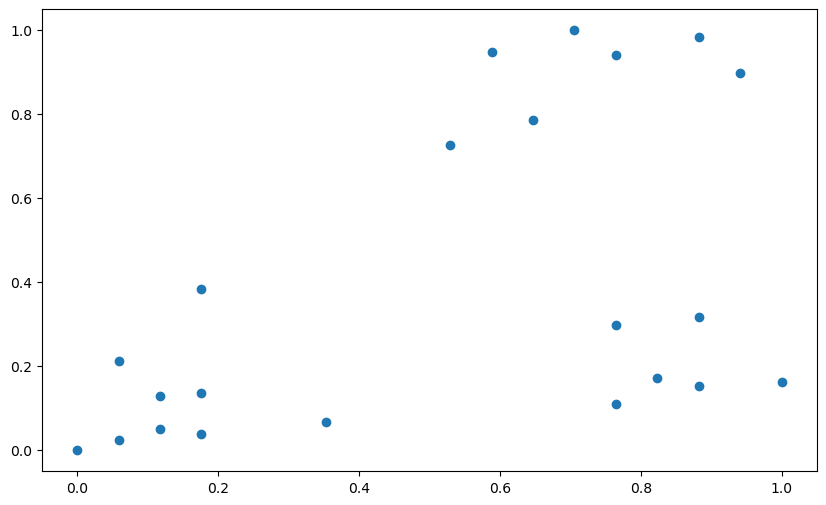

In [433]:
plt.scatter(df.Age,df['Income($)'])

In [435]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [436]:
df['cluster']=y_predicted
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        2

In [437]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

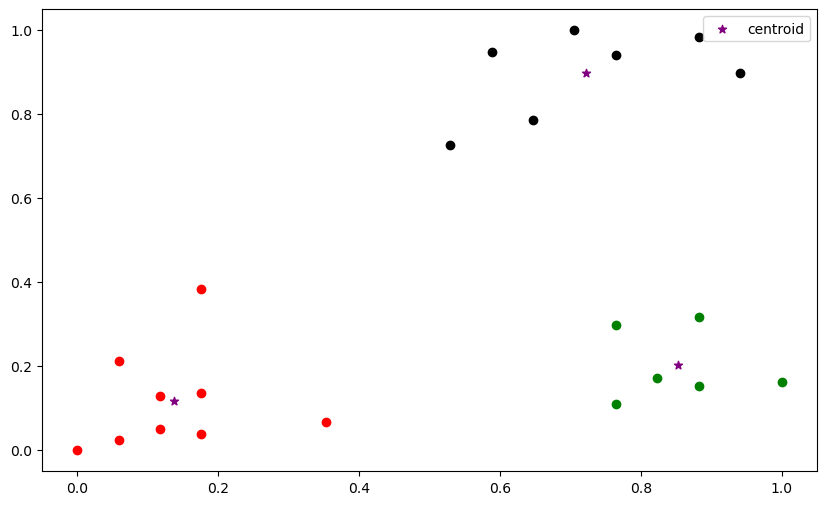

In [438]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [439]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

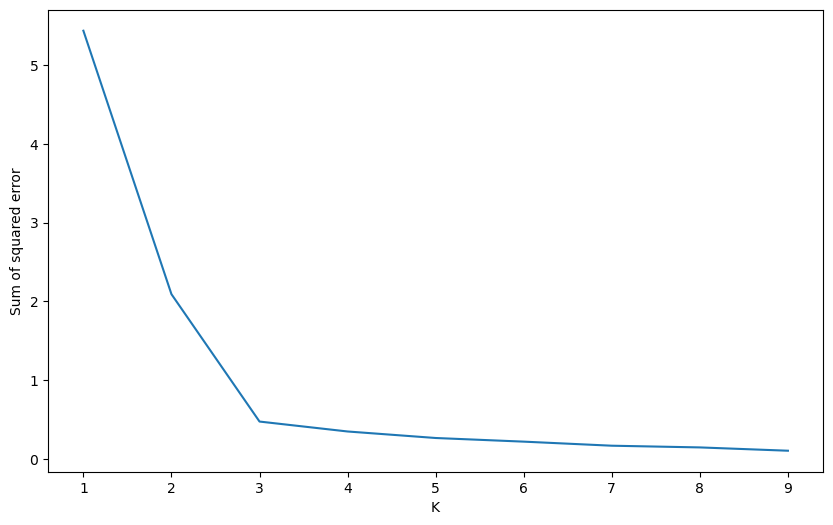

In [440]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Exercise

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [482]:
from sklearn.datasets import load_iris
data=load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [483]:
df= pd.DataFrame(data.data, columns=data.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [484]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [486]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the specified columns
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

In [487]:
model=KMeans(n_clusters=3)
y_predicted=model.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [488]:
df['cluster']=y_predicted
df

petal length (cm)  petal width (cm)  cluster
0            -1.340227         -1.315444        1
1            -1.340227         -1.315444        1
2            -1.397064         -1.315444        1
3            -1.283389         -1.315444        1
4            -1.340227         -1.315444        1
..                 ...               ...      ...
145           0.819596          1.448832        2
146           0.705921          0.922303        2
147           0.819596          1.053935        2
148           0.933271          1.448832        2
149           0.762758          0.790671        2

[150 rows x 3 columns]

In [489]:
model.cluster_centers_

array([[ 0.3058728 ,  0.16541778],
       [-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813]])

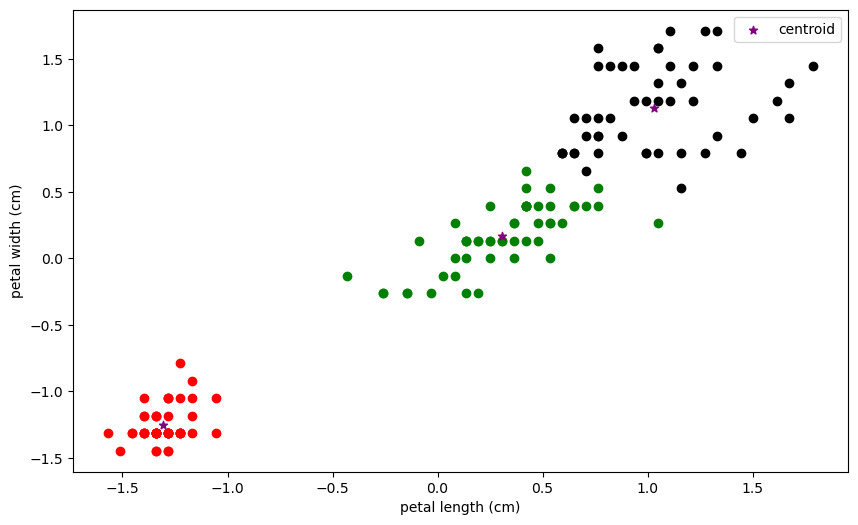

In [490]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [491]:
sse=[]
kran=range(1,10)
for i in kran:
    model=KMeans(n_clusters=i)
    model.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(model.inertia_)

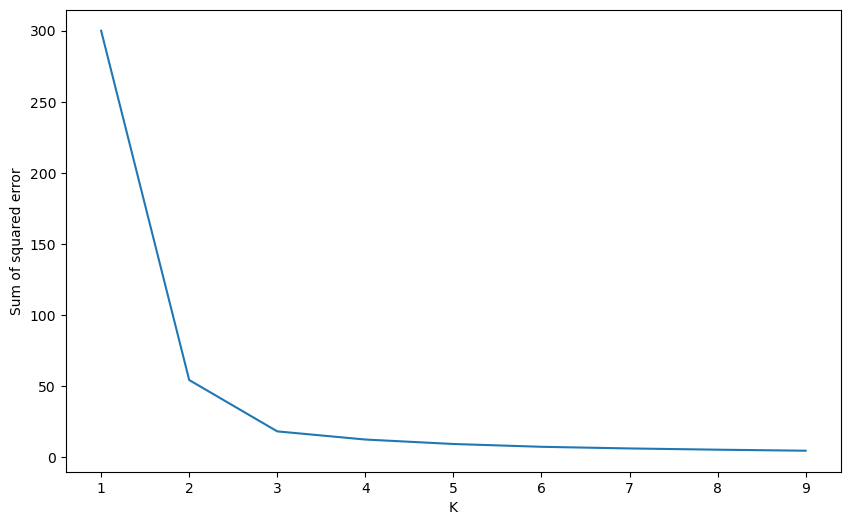

In [492]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kran,sse)
plt.show()